In [1]:
import numpy as np
import pandas as pd
import sklearn
import plotly.express as px
import seaborn as sns

In [2]:
# Prepare our system to download the datasets from a repository
import os
import opendatasets as od

# Assign the Kaggle data set URL into variable
credit_card_fraud = 'https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud'
# Using opendatasets let's download the data sets
od.download(credit_card_fraud)

Skipping, found downloaded files in ".\credit-card-fraud" (use force=True to force download)


In [3]:
data_dir = './credit-card-fraud'
os.listdir(data_dir)

credit_card = pd.read_csv('credit-card-fraud/card_transdata.csv')

# Displaying the first 10 records
credit_card.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [4]:
# Random 10 samples of data
credit_card.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
383988,2.123239,0.371611,0.458217,1.0,0.0,0.0,1.0,0.0
258013,23.088148,0.689645,0.517478,1.0,0.0,0.0,0.0,0.0
811546,1.028570,0.063213,9.197017,0.0,0.0,0.0,1.0,1.0
60057,28.482831,0.147538,0.063696,1.0,0.0,0.0,1.0,0.0
689605,22.873949,0.492920,5.760671,1.0,0.0,1.0,0.0,0.0
650003,24.892365,3.003480,3.854713,1.0,0.0,1.0,0.0,0.0
95939,2.239137,0.502651,1.425145,1.0,1.0,0.0,1.0,0.0
330734,131.902635,12.811292,0.698003,1.0,0.0,1.0,0.0,0.0
599127,2.306635,1.837450,0.160413,1.0,0.0,0.0,0.0,0.0
988001,3.661091,1.008748,0.362295,1.0,0.0,0.0,1.0,0.0


In [6]:
# Displaying all the data information to check for any non-values (missing data)
credit_card.info()

# Checking for missing values (NaNs) in the DataFrame
print(credit_card.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
False


In [8]:
#data structure
credit_card.shape

(1000000, 8)

In [10]:
credit_card.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


**Data pre-processing and data analysis**

Next some data preprocessing and exploratory data analysis was done to see how many fraud cases and non-fraud cases were in the dataset. In addition, the percentage of fraud cases in the overall recorded transactions was calculated.

In [11]:
# Understanding the proportionality of data fraud and non-fraud categories
cases = len(credit_card)
nonfraud_count = len(credit_card[credit_card.fraud == 0])
fraud_count = len(credit_card[credit_card.fraud == 1])
fraud_percentage = round(fraud_count/cases*100, 2)
print("Cases number is {}, fraud case is {}, and fraud percentage is {}%".format(cases, fraud_count, fraud_percentage))

Cases number is 1000000, fraud case is 87403, and fraud percentage is 8.74%


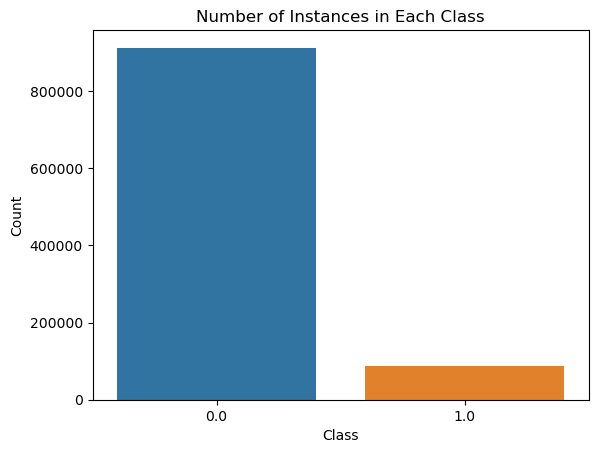

In [12]:
import matplotlib.pyplot as plt

sns.countplot(data=credit_card, x='fraud')

plt.title('Number of Instances in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

The number of fraud cases is 87403, the total number of cases is 1000000 and the percentage of fraud cases is 8.74 percent. In this case, it is an unbalanced data set. So we will perform data resampling before performing model training to achieve balance in the training data and avoid the model tendency to judge the data as majority class.

Distinguish the data into fraud and non-fraud two parts and then do the basic description of the data, compared to the overall sample of the description can be a glimpse of some of the laws and assumptions to determine the fraudulent transactions.

In [13]:
fraud_cases_data=credit_card[credit_card.fraud == 1]
fraud_cases_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


The results of the descriptive statistical analysis for fraudulent transactions (fraud labelled 1) lead to the following conclusions:

1. **distance_from_home**.
   - The mean distance (mean) of the fraudulent transactions is about 66.26 km, which is farther than the mean distance of all transactions (26.63 km), indicating that the average distance between the cardholder's "home" location and the transaction location is greater at the time of the fraudulent transaction.
   - A larger standard deviation (std) means that fraudulent transactions are more geographically dispersed and span a larger geographic area.

2. **distance_from_last_transaction**.
   - The average distance (mean) of the fraudulent transaction from the previous transaction is 12.71 km, which is also farther compared to the average distance of all transactions (5.04 km), which may reflect that fraudulent transactions are more inclined to occur across regions in a short period of time.

3. **ratio_to_median_purchase_price**.
   - The ratio of the average to median purchase price (mean) for fraudulent transactions is approximately 6.01, which is significantly higher compared to all transactions (1.82), suggesting that fraudulent transactions may be more unusual and more likely to deviate from a user's regular spending level.

4. **repeat_retailer**.
   - The proportion of repeat retailers in fraudulent transactions (MEAN) is almost the same as overall, which implies that a large proportion of fraudulent transactions also occur at repeat retailers, but is not an effective distinguishing characteristic between fraud and non-fraud.

5. **used_chip** and **used_pin_number**.
   - The proportion of chip payments used in fraudulent transactions (MEAN) is 0.256, which is lower than the overall 0.350, possibly suggesting that chip payments are less commonly used in fraudulent transactions.
   - The proportion (mean) of PIN codes used is extremely low at 0.003, which may imply that fraudsters tend to avoid using PIN codes for authentication as they improve transaction security.

6. **online_order**.
   - The proportion (MEAN) of online orders in fraudulent transactions is as high as 0.946, and almost all fraudulent transactions are completed online, which is related to the anonymity and remote manipulation characteristics of online transactions, suggesting that online transaction scenarios are more prone to fraud.

**In summary, fraudulent transactions are characterised by the following features:**
- The location of occurrence is distant from the cardholder's usual place of residence or the location of the previous transaction.
- The transaction amount deviates more from the user's norm.
- There is a greater tendency not to use chip payments and PIN verification.
- The majority of fraudulent transactions occur in an online environment. 


In [14]:
nonfraud_cases_data=credit_card[credit_card.fraud == 0]
nonfraud_cases_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


The following insights can be derived from the descriptive statistical analysis of the data for non-fraudulent transactions (fraud labelled 0):

1. **distance_from_home**.
   - The average distance from the cardholder's home address for non-fraudulent transactions is 22.83 km, which is much closer compared to 66.26 km for fraudulent transactions, which may indicate that non-fraudulent transactions are more inclined to take place near the cardholder's living circle.

2. **distance_from_last_transaction**.
   - The average distance from the previous transaction for non-fraudulent transactions is 4.30 km, which is smaller compared to 12.71 km for fraudulent transactions, showing that non-fraudulent transactions are not as geographically diverse as fraudulent transactions.

3. **ratio_to_median_purchase_price**.
   - The ratio of the average to median purchase price for non-fraudulent transactions is 1.42, which is smaller than the 6.01 for fraudulent transactions, indicating that non-fraudulent transactions are closer to the user's regular spending level and do not fluctuate as much.

4. **repeat_retailer**.
   - The proportion of non-fraudulent transactions that are repeated at the same retailer is about 88.17%, which again confirms that most of the transactions made by users at familiar retailers are non-fraudulent in nature.

5. **used_chip** and **used_pin_number**.
   - The proportion of non-fraudulent transactions using chip payments was 35.94 per cent, slightly higher than the 25.64 per cent of fraudulent transactions, suggesting that non-fraudulent transactions are somewhat more favourable to relatively secure payment methods.
   - The proportion of PIN code use is 10.99 per cent, which is not high but significantly higher than the 0.31 per cent of fraudulent transactions, indicating that PIN code verification is more commonly used in non-fraudulent transactions.

6. **online_order**.
   - The proportion of online orders in non-fraudulent transactions was 62.22%, slightly lower than the 94.63% of fraudulent transactions, but still accounted for a relatively high percentage, indicating that online transactions in non-fraudulent transactions is also the mainstream mode, but fraudulent transactions are more inclined to occur online.

**Taken together, the characteristics of non-fraudulent transactions include**
- Relatively stable geographical location, mostly occurring near the cardholder's usual place of residence.
- The amount of the transaction is more in line with the user's spending habits and is less volatile.
- In terms of payment methods, chip payment and PIN code verification are preferred over fraudulent transactions.
- Despite the high proportion of online transactions, the proportion of offline transactions is still greater than that of fraudulent transactions.

In [15]:
#explore the correlation of features
cormat = credit_card.corr()
round(cormat,3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000,0.000,-0.001,0.143,-0.001,-0.002,-0.001,0.188
distance_from_last_transaction,0.000,1.000,0.001,-0.001,0.002,-0.001,0.000,0.092
ratio_to_median_purchase_price,-0.001,0.001,1.000,0.001,0.001,0.001,-0.000,0.462
repeat_retailer,0.143,-0.001,0.001,1.000,-0.001,-0.000,-0.001,-0.001
used_chip,-0.001,0.002,0.001,-0.001,1.000,-0.001,-0.000,-0.061
used_pin_number,-0.002,-0.001,0.001,-0.000,-0.001,1.000,-0.000,-0.100
online_order,-0.001,0.000,-0.000,-0.001,-0.000,-0.000,1.000,0.192
fraud,0.188,0.092,0.462,-0.001,-0.061,-0.100,0.192,1.000


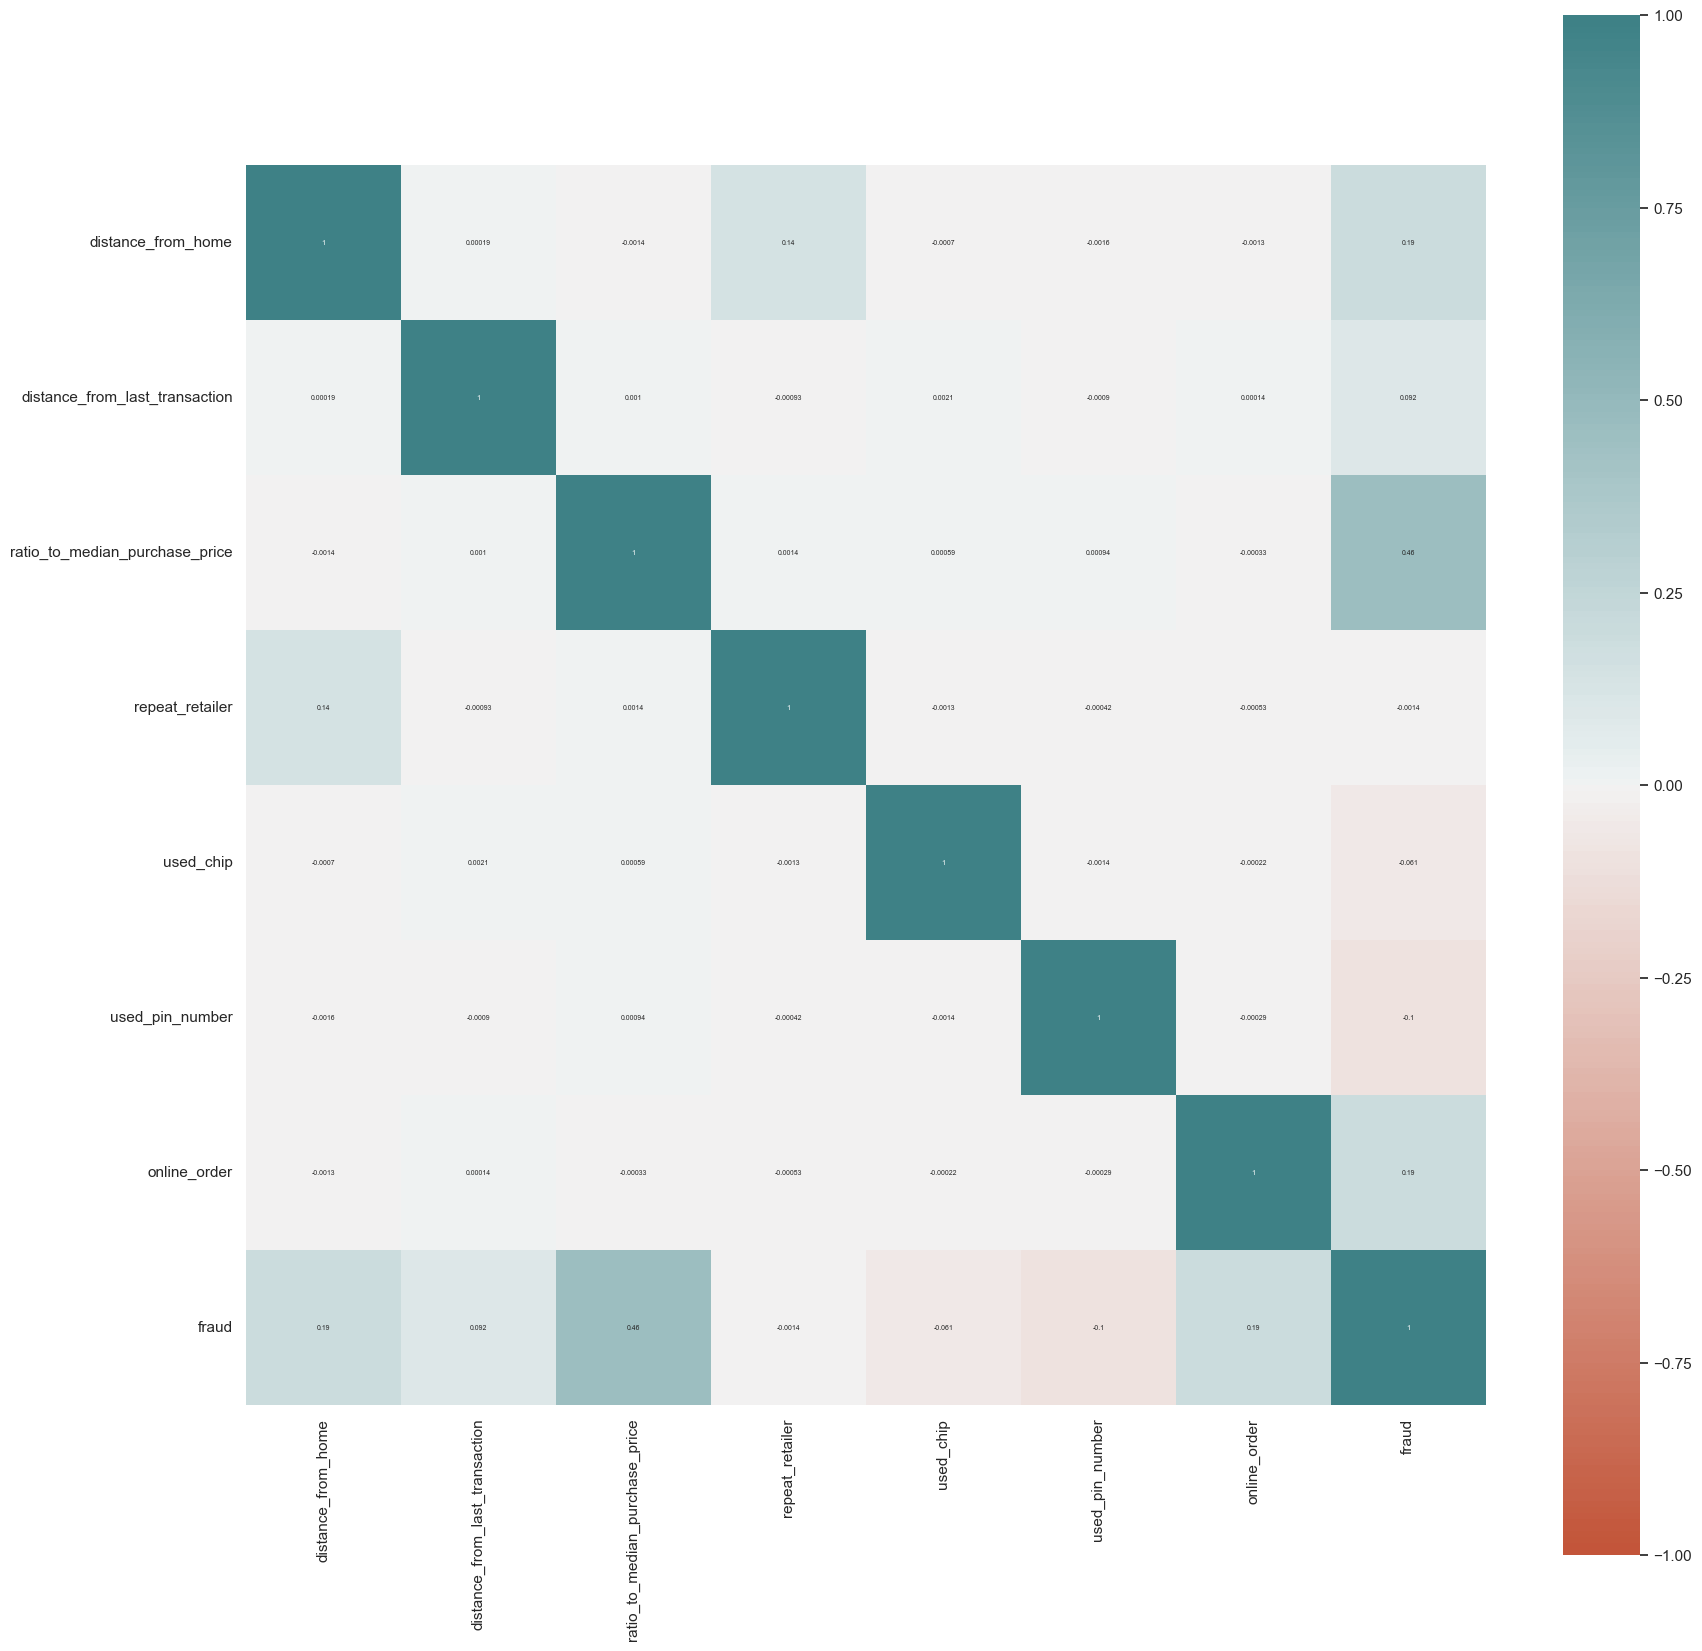

In [16]:
#plot the corresponding correlation matrix as a heatmap
plt.figure(figsize = (20,20))

sns.set(font_scale=1.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size':5})

In [17]:
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
categorical_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
target_col = [ 'fraud']

numeric_df = credit_card[numerical_cols]  # Extract numeric columns
categorical_df = credit_card[categorical_cols]  # Extract sorted columns

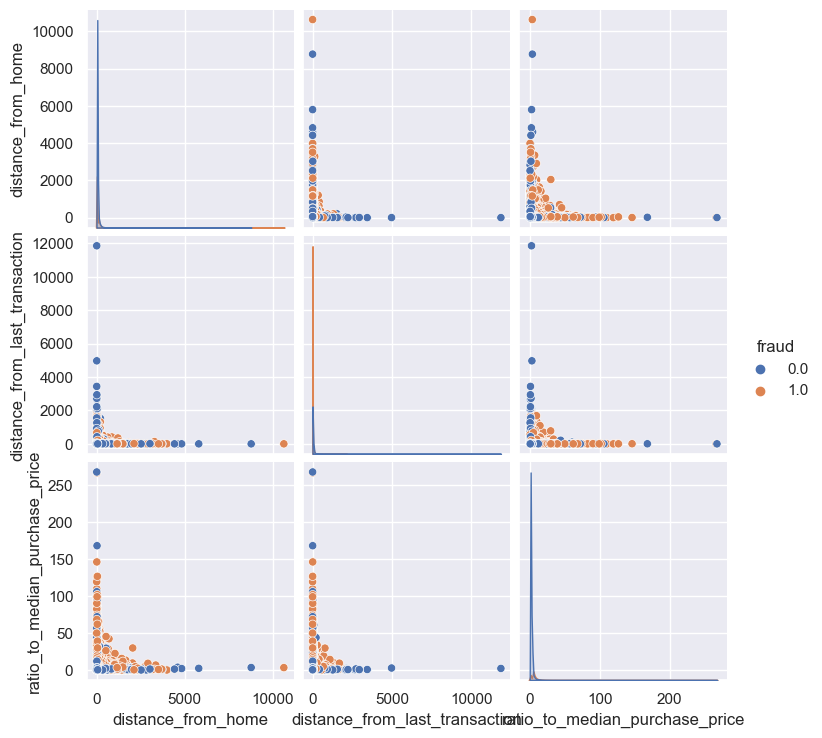

In [19]:
# Join the numerical DataFrame with the target column DataFrame
fraud_df = credit_card[target_col]
combined_df = numeric_df.join(fraud_df)  # Replace with actual DataFrame names if different

# Now create a pairplot with the hue set to target variable
numeric_pairplot = sns.pairplot(combined_df, vars=numerical_cols, hue='fraud')

# Display the plot
plt.xticks(rotation=45)
plt.show()

From the provided scatterplot matrix with different colored points indicating whether a transaction is fraudulent (1.0 in orange) or not (0.0 in blue), we can deduce several insights:

1. **Clustering of Fraudulent Transactions**: There seems to be a clustering of fraudulent transactions at certain levels of `distance_from_home` and `distance_from_last_transaction`. This could suggest that fraud tends to occur within certain distance ranges. For example, there are noticeable orange points (fraudulent transactions) at the lower end of the `distance_from_home` axis.

2. **Fraudulent Transactions Relative to Distance**: There's a visible concentration of fraudulent transactions at lower `distance_from_home` and `distance_from_last_transaction` values, which might be counterintuitive if one expects fraudulent transactions to occur far from the cardholder's home or the location of the last transaction. This could indicate that fraudsters might operate within the typical geographic profile of the cardholder to avoid raising suspicion.

3. **Ratio to Median Purchase Price**: For `ratio_to_median_purchase_price`, fraud seems to be more prevalent at higher ratios. This suggests that transactions that are significantly larger than the median purchase amount are more likely to be fraudulent. However, there are also fraudulent transactions that are close to or below the median purchase amount, indicating that while high transaction amounts are a risk indicator, they are not the sole characteristic of fraud.

4. **Distribution Patterns**: Both fraudulent and non-fraudulent transactions have similar distribution patterns in the scatterplots, which suggests that other non-visualized features or combinations of features might be necessary to accurately distinguish between the two.

5. **Outliers**: There are several outliers in terms of distance and purchase price ratio. It is interesting to note that some high `distance_from_last_transaction` points are marked as fraudulent, which could be indicative of stolen card details being used far from the original cardholder's usual locations.

6. **Limitation in Visualization**: The overlap of the blue and orange points can make it difficult to discern clear boundaries between fraudulent and non-fraudulent transactions. This might be a limitation of visualizing high-dimensional data in a 2D space.

The visualization suggests that while there are some tendencies and patterns associated with fraud, sophisticated analytical techniques or machine learning models might be required to effectively distinguish fraudulent from legitimate transactions.

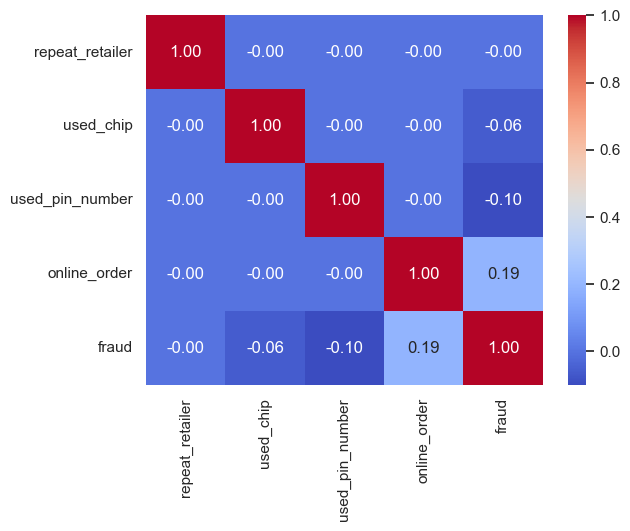

In [20]:
# Combined_df_cate includes both the binary categorical features and the 'fraud' target
# Calculate the correlation matrix which is useful for binary variables
combined_df_cate = categorical_df.join(fraud_df) 
cate_correlation_matrix = combined_df_cate[categorical_cols + ['fraud']].corr()

# Now create a heatmap
sns.heatmap(cate_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Display the plot
plt.show()

The heat map shows that most of the category features have a low correlation with fraud (fraud). This can be judged by the shades of the colour blocks, where lighter blues and reds indicate a weaker correlation.

Low correlations indicate that these features alone may not contribute much to predicting fraud, but this does not mean that they are useless in the model. Sometimes, even features with low correlation may have an impact on the model when combined with other variables, especially in non-linear models. So we will try different models at a later stage, such as decision trees, random forests, linear SVC or SGD classifier, etc., which capture non-linear relationships and interactions between features, to see if more information can be extracted from these features.

**Data standardisation/Feature Scaling**

We can do the usual preprocessing of the data to standardise the possible feature attributes, because the algorithm assumes that all features in all datasets are concentrated around 0 and have the same variance, if the variance of a feature is much larger than the variance of the other features, then that feature may have a larger weight in the objective function, and the difference is too large, which will have a great impact on the convergence speed, and even may not converge, here sk-learn comes with StandardScaler() to standardise it.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_card_num_scaled = scaler.fit_transform(numeric_df)
credit_card_num_scaled_pd=pd.DataFrame(credit_card_num_scaled, columns = numerical_cols)
credit_card_num_scaled_pd

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,0.477882,-0.182849,0.043491
1,-0.241607,-0.188094,-0.189300
2,-0.329369,-0.163733,-0.498812
3,-0.372854,0.021806,-0.522048
4,0.268572,-0.172968,0.142373
...,...,...,...
999995,-0.373473,-0.190529,-0.070505
999996,-0.103318,-0.091035,0.340808
999997,-0.362650,-0.137903,-0.573694
999998,-0.342098,-0.185523,-0.481628


In [22]:
# Normalise the numeric columns and rejoin them with the categorical columns, excluding the y-variable (target variable).
credit_card_scaled = pd.concat([credit_card_num_scaled_pd, categorical_df], axis=1)

# Add the target variable too
y_df = credit_card[target_col]
credit_card_scaled_with_y = pd.concat([credit_card_scaled,y_df ], axis=1)

credit_card_scaled_with_y

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,1.0,1.0,0.0,0.0,0.0
999996,-0.103318,-0.091035,0.340808,1.0,1.0,0.0,0.0,0.0
999997,-0.362650,-0.137903,-0.573694,1.0,1.0,0.0,1.0,0.0
999998,-0.342098,-0.185523,-0.481628,1.0,0.0,0.0,1.0,0.0


### Balancing of unbalanced data

In [23]:
from sklearn.utils import resample
# which indicates 0 for non-fraud and 1 for fraud cases

# Separate the cases into fraud and non-fraud
nonfraud = credit_card_scaled_with_y[credit_card.fraud == 0]
fraud = credit_card_scaled_with_y[credit_card.fraud == 1]

# Downsample the non-fraud cases
nonfraud_downsampled = resample(nonfraud,
                                replace=False,  # sample without replacement
                                n_samples=len(fraud),  # to match minority class
                                random_state=42)  # reproducible results

# Combine the downsampled non-fraud cases with fraud cases
credit_card_downsampled = pd.concat([nonfraud_downsampled, fraud])

# Check the counts of each class to confirm they are balanced
print(credit_card_downsampled.fraud.value_counts())

0.0    87403
1.0    87403
Name: fraud, dtype: int64


In [24]:
credit_card_downsampled.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
674731,0.096921,-0.085432,3.599432,1.0,0.0,0.0,1.0,1.0
500383,0.161613,-0.185943,1.105785,1.0,0.0,0.0,1.0,1.0
729321,-0.367085,-0.182767,0.777810,1.0,1.0,0.0,1.0,1.0
123858,-0.359232,-0.179101,1.166923,1.0,0.0,0.0,1.0,1.0
745966,0.022530,-0.180508,0.893983,1.0,1.0,0.0,1.0,1.0
524305,-0.199473,-0.180218,-0.371621,1.0,0.0,0.0,1.0,0.0
44336,-0.239698,-0.022652,-0.604088,1.0,0.0,0.0,1.0,0.0
513229,-0.396555,-0.163972,-0.333615,0.0,0.0,0.0,0.0,0.0
350827,-0.386767,-0.166735,-0.212259,0.0,0.0,0.0,1.0,0.0
850800,-0.396380,-0.194274,1.765965,0.0,0.0,0.0,1.0,1.0


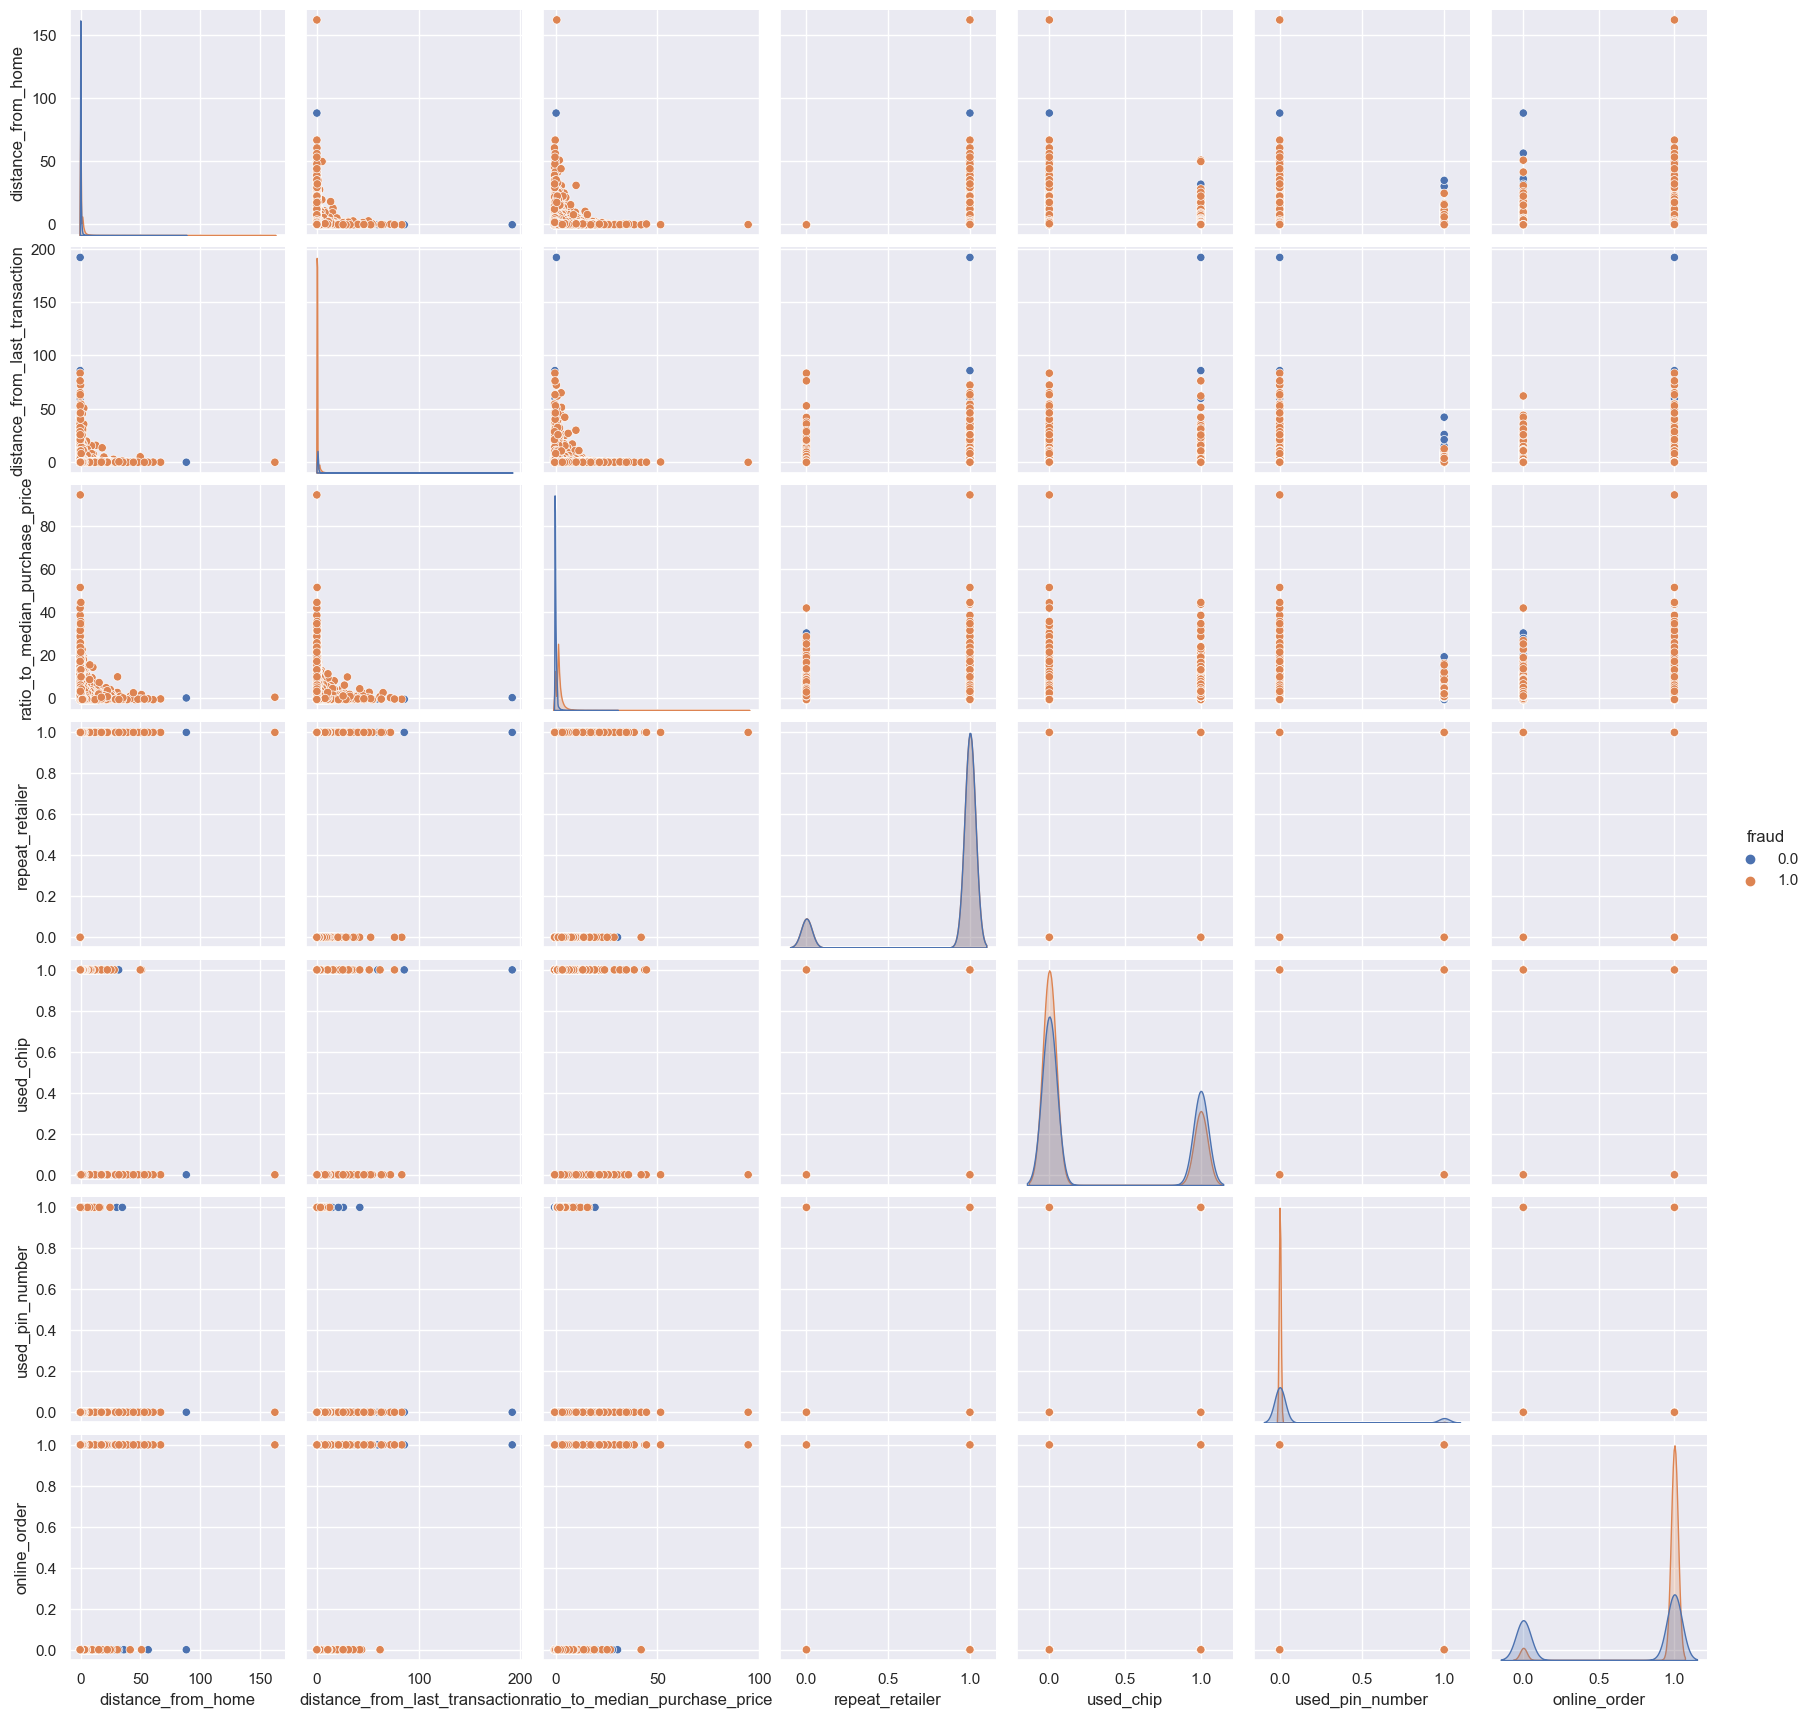

In [25]:
sns.pairplot(credit_card_downsampled, hue='fraud')
plt.show()

### Split training, validation and test sets

In [26]:
from sklearn.model_selection import train_test_split

# Remove the 'fraud' column to create a feature set, and use the downsampled and balanced data for the training, validation, and test sets.
X_resample = credit_card_downsampled.drop('fraud', axis=1)

# Get the target column y
y = credit_card_downsampled['fraud']

# Split the data into a training set, a validation set, and a test set 
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_resample, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp,y_train_temp,test_size=0.25, random_state=42)

## Initial model training: logistic regression, K-neighbourhood, decision trees, random forests

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

logistic = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

models = [logistic, knn, decision_tree, random_forest]

xvals = [cross_validate(m, X_train, y_train, return_train_score=True,n_jobs = -1,cv = 3) for m in models]

print(xvals)

[{'fit_time': array([0.09272051, 0.09272051, 0.08472228]), 'score_time': array([0.00400305, 0.00400305, 0.00400114]), 'test_score': array([0.94310803, 0.93976145, 0.9419067 ]), 'train_score': array([0.94173508, 0.94203541, 0.94081977])}, {'fit_time': array([0.17999911, 0.18400002, 0.17199898]), 'score_time': array([1.35919714, 1.41424704, 1.37145758]), 'test_score': array([0.99513744, 0.99488001, 0.99645319]), 'train_score': array([0.99671062, 0.99661051, 0.99662481])}, {'fit_time': array([0.09752464, 0.09999871, 0.09999871]), 'score_time': array([0.0080142 , 0.00800061, 0.00399876]), 'test_score': array([0.99977117, 0.99977117, 0.99988559]), 'train_score': array([1., 1., 1.])}, {'fit_time': array([4.70175338, 4.71725273, 4.77951717]), 'score_time': array([0.18271422, 0.19266534, 0.19338584]), 'test_score': array([0.99982838, 1.        , 0.99988559]), 'train_score': array([1., 1., 1.])}]


1. **Logistic regression**:
   - Short training time (`fit_time` averages about 0.09 seconds) and short scoring time (`score_time` averages about 0.004 seconds).
   - The average accuracy is about 94.1% on the test set and 94.2% on the training set. This indicates that the model performs similarly on the training and test sets, with no significant overfitting or underfitting.

2. **K-nearest neighbours**:
   - The training time is shorter (`fit_time` averages about 0.18 seconds), but the scoring time is longer (`score_time` averages about 1.38 seconds).
   - The accuracy of both the test set and the training set is very high, averaging 99.5% and 99.6% respectively.KNN performs well on this dataset.

3. **Decision Tree**:
   - Training time and scoring time are very short (`fit_time` averages about 0.10 seconds and `score_time` averages about 0.007 seconds).
   - Accuracy was almost perfect, averaging about 99.98% for the test set and 100% for the training set. This may indicate that the model is overfitting on the training data.

4. **Random Forest**:
   - Relatively long training time (`fit_time` averaged about 4.73 seconds) and short scoring time (`score_time` averaged about 0.19 seconds).
   - Accuracy was almost perfect, with both the test and training sets close to or at 100%. Despite the long training time, Random Forest provides extremely high accuracy and good generalisation (given the high accuracy of the test set).

### Summary
Of these models, Random Forest and Decision Tree provide the highest accuracy, but Decision Tree shows signs of possible overfitting (100% accuracy on the training set). Random Forest performed better in terms of generalisation ability, although it took longer to train.K-Nearest Neighbour also demonstrated high accuracy, but was more time consuming in the scoring phase, which can be a problem on large datasets. Logistic regression offers relatively low accuracy, but is fast to train and score, and may be better suited to scenarios that require rapid iteration. The choice of each model depends on the specific application scenario, the size of the dataset, and the trade-off between accuracy and computational efficiency.

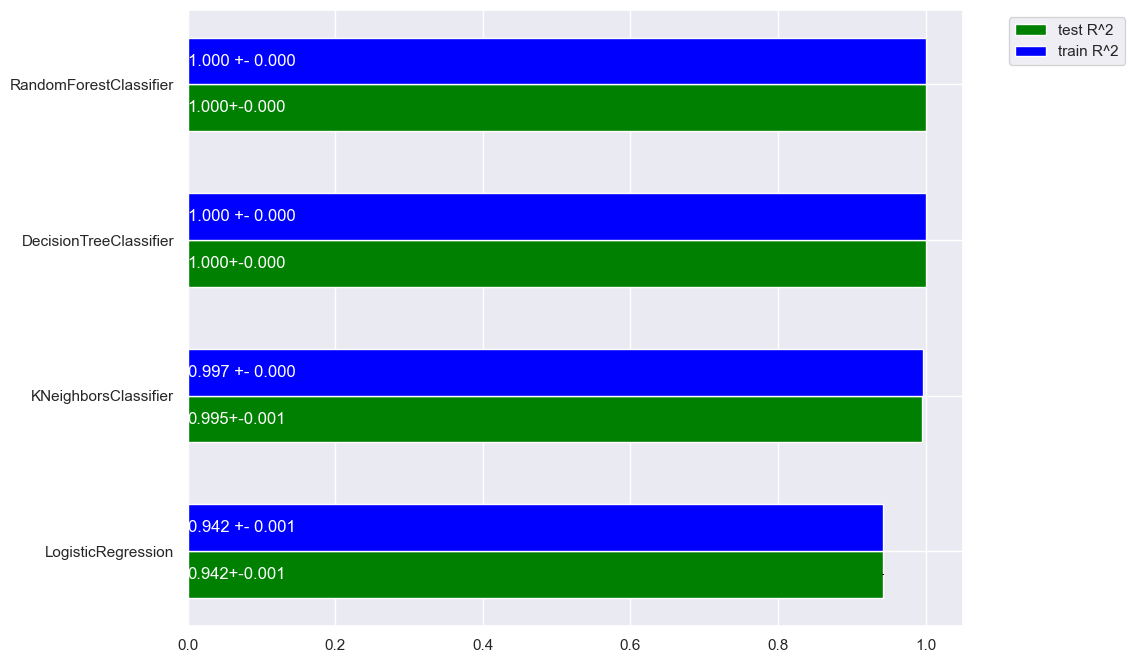

In [30]:
train_scores = [result['train_score'] for result in xvals]
test_scores = [result['test_score'] for result in xvals]

fig, ax = plt.subplots(figsize=(10, 8))
width = 0.3 


ax.barh(np.arange(len(train_scores)) - width*1.5, np.mean(test_scores, axis=1), width,
        yerr=np.std(test_scores, axis=1), color='green', label='test R^2')


ax.barh(np.arange(len(train_scores)) - width*0.5, np.mean(train_scores, axis=1), width,
        yerr=np.std(train_scores, axis=1), color='blue', label='train R^2')


for i, te, tr in zip(np.arange(len(train_scores)), test_scores, train_scores):
    ax.text(0, i - width * 1.5, "{:.3f}+-{:.3f}".format(np.mean(te), np.std(te)),
             color=('white' if np.mean(te) > 0.1 else 'black'), va='center')
    ax.text(0, i - width * 0.5, "{:.3f} +- {:.3f}".format(np.mean(tr), np.std(tr)),
             color=('white' if np.mean(tr) > 0.1 else 'black'), va='center')


labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores)) - width, yticklabels=labels)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

**Introducing more evaluation criteria to judge the performance of initially trained models, not singularly focusing on R-squared**

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

# Prepare a list of models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]


model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']


for model, name in zip(models, model_names):
   
    model.fit(X_train, y_train)

    # Training set evaluation
    train_predictions = model.predict(X_train)
    train_cm = confusion_matrix(y_train, train_predictions)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_recall = recall_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions)
    train_f1 = f1_score(y_train, train_predictions)
    
    print(f"\nTraining set of {name} Confusion Matrix:\n", train_cm)
    print(f"Training set of {name} Accuracy:", train_accuracy)
    print(f"Training set of {name} Recall:", train_recall)
    print(f"Training set of {name} Precision:", train_precision)
    print(f"Training set of {name} F1 Score:", train_f1)

    # Validation set evaluation
    val_predictions = model.predict(X_val)
    val_cm = confusion_matrix(y_val, val_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_recall = recall_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions)
    val_f1 = f1_score(y_val, val_predictions)
    
    print(f"\nValidation set of {name} Confusion Matrix:\n", val_cm)
    print(f"Validation set of {name} Accuracy:", val_accuracy)
    print(f"Validation set of {name} Recall:", val_recall)
    print(f"Validation set of {name} Precision:", val_precision)
    print(f"Validation set of {name} F1 Score:", val_f1)


Training set of Logistic Regression Confusion Matrix:
 [[48805  3523]
 [ 2606 49949]]
Training set of Logistic Regression Accuracy: 0.9415634564228712
Training set of Logistic Regression Recall: 0.9504138521548854
Training set of Logistic Regression Precision: 0.9341150508677438
Training set of Logistic Regression F1 Score: 0.9421939694606092

Validation set of Logistic Regression Confusion Matrix:
 [[16411  1190]
 [  884 16476]]
Validation set of Logistic Regression Accuracy: 0.9406767540974228
Validation set of Logistic Regression Recall: 0.9490783410138249
Validation set of Logistic Regression Precision: 0.9326389675082079
Validation set of Logistic Regression F1 Score: 0.9407868440586993

Training set of KNN Confusion Matrix:
 [[52031   297]
 [    5 52550]]
Training set of KNN Accuracy: 0.9971206010506946
Training set of KNN Recall: 0.9999048615735896
Training set of KNN Precision: 0.994380002649157
Training set of KNN F1 Score: 0.9971347792262008

Validation set of KNN Confusion 

Looking at the results of the performance evaluation on the training and validation sets, we can analyse the performance of these models from several different perspectives.

### 1. **Logistic Regression**
- **The training and validation sets perform similarly**, showing good generalisation. The accuracy, recall, precision and F1 score are quite high, indicating that the model is effective in handling the dataset.
- The accuracy is about 94.1% while the F1 score is 94.2%, which shows that the model does a fairly good job of balancing recall and precision.

### 2. **K-Nearest Neighbors**
- **Performs well** with accuracy, recall, precision, and F1 scores near perfect on the training set and very high on the validation set.
- Accuracy is 99.7% on the training set and 99.6% on the validation set. The extremely high recall and precision indicate that the model can identify and classify positive and negative samples very efficiently.

### 3. **Decision Tree** 
- **Perfect training set performance** with 100% accuracy, recall, precision and F1 score. This may indicate that the model is overfitting on the training set.
- **The validation set performs equally well** with near perfect accuracy. Although there are signs of overfitting, the high accuracy indicates that the model maintains excellent predictive power on unseen data.

### 4. **Random Forest**
- **performs perfectly**, achieving 100% on all metrics on both the training and validation sets. This shows that Random Forest is extremely capable of handling complex datasets, effectively reducing overfitting and providing stable predictive performance.
- The perfect performance may be due to the fact that the model considers a large number of random features and samples during the training process, allowing the model to make accurate predictions on different subsets of data.

### Summary
- **Logistic regression** provides consistent, generalisation-capable performance, but is slightly lower in accuracy than the other models.
- **KNN** and **Decision Tree** showed signs of overfitting on the training set but still performed well on the validation set, with KNN, in particular, showing efficient classification capabilities.
- **Random Forest** demonstrated its strong performance as an integrated learning method, suitable for handling large datasets containing complex patterns with excellent generalisation capabilities.

When selecting a model, the complexity of the model, the time cost of training and prediction, and the characteristics of the data should be considered. For applications that require fast response, logistic regression and KNN may be more appropriate, while for cases where high accuracy is required and long training time can be afforded, random forests may be a better choice.

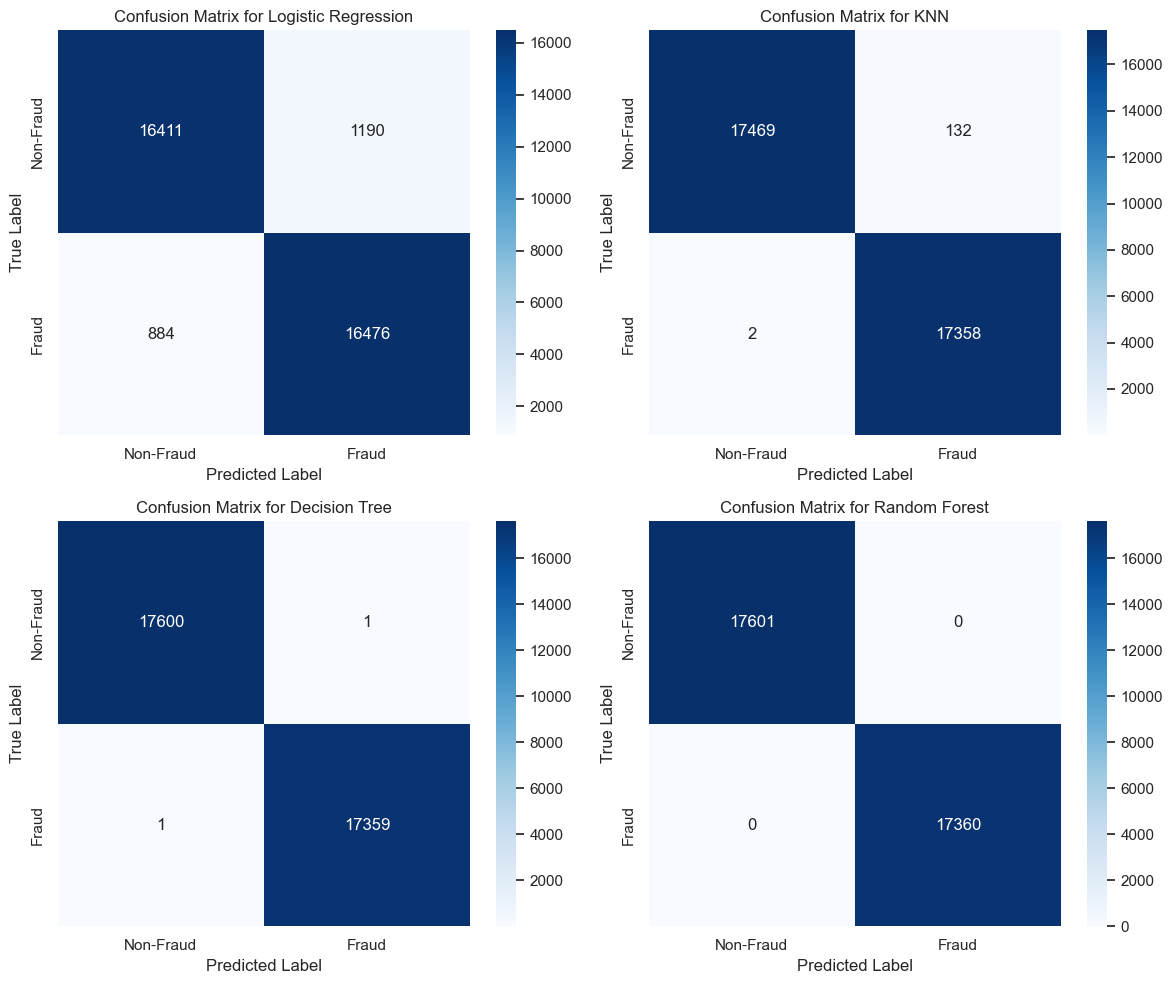

In [35]:
# Confusion matrix data
conf_matrices = {
    'Logistic Regression': [[16411, 1190], [884, 16476]],
    'KNN': [[17469, 132], [2, 17358]],
    'Decision Tree': [[17600, 1], [1, 17359]],
    'Random Forest': [[17601, 0], [0, 17360]]
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_title(f'Confusion Matrix for {model}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

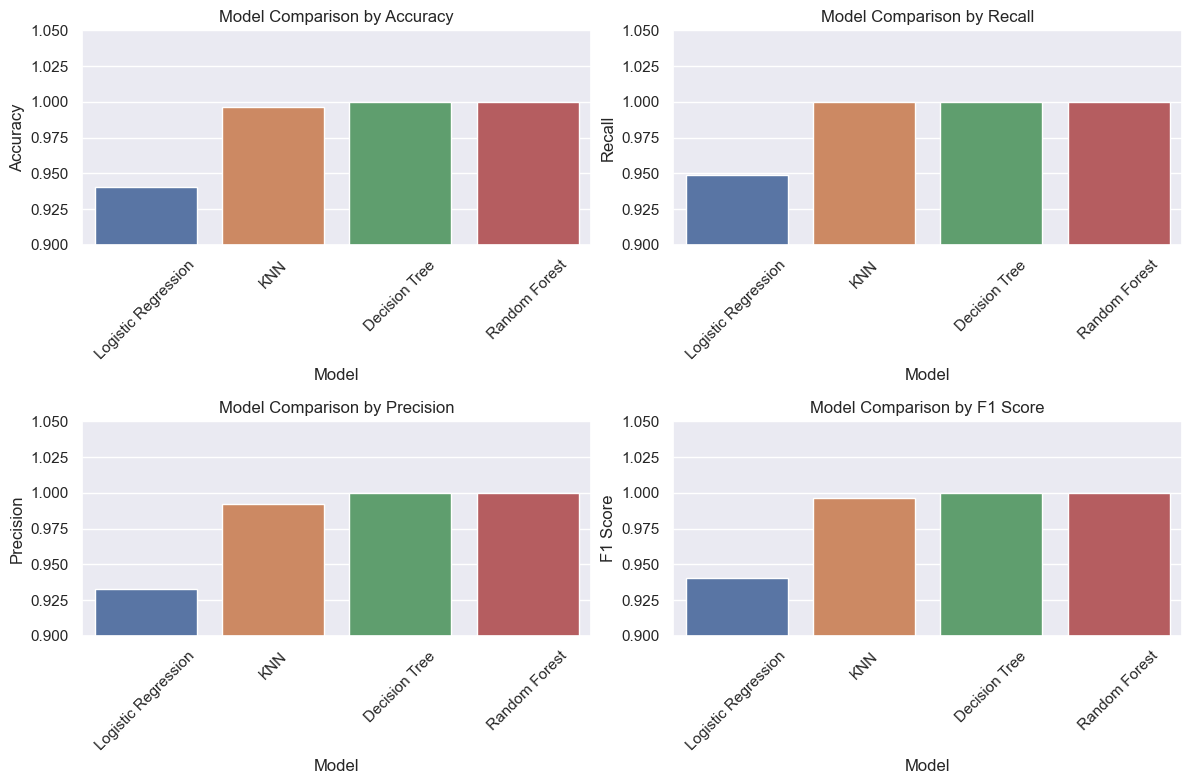

In [36]:
#Scoring data for the validation set

data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.9407, 0.9962, 0.9999, 1.0],
    'Recall': [0.9491, 0.9999, 0.9999, 1.0],
    'Precision': [0.9326, 0.9925, 0.9999, 1.0],
    'F1 Score': [0.9408, 0.9962, 0.9999, 1.0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))

# of bar charts for each performance indicator
for i, column in enumerate(['Accuracy', 'Recall', 'Precision', 'F1 Score'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=column, data=df)
    plt.title(f'Model Comparison by {column}')
    plt.ylim(0.9, 1.05)  
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

## Parameter tuning for several models that may be overfitting

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the search range for hyperparameters
param_rf = {
    'n_estimators': range(100, 151, 50),
    'max_depth': range(10, 31, 10),
    'min_samples_split': range(2, 22, 4),
    'min_samples_leaf': range(1, 10, 2)
}

param_d = {
    'max_depth': range(10, 31, 10),
    'min_samples_leaf': range(1, 5, 2)
}

param_kn = {
    'kneighborsclassifier__n_neighbors': range(1, 21, 4)
}

# Create a list of models
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'k_neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier())
}

grids = {
    'random_forest': param_rf,
    'decision_tree': param_d,
    'k_neighbors': param_kn
}

# Conduct grid searches
search_results = {}
for key in models.keys():
    model = models[key]
    param_grid = grids[key]
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    search_results[key] = grid_search

for key, search in search_results.items():
    print(f"The best parameters for {key} are {search.best_params_}")
    print(f"The best score for {key} is {search.best_score_}\n")


The best parameters for random_forest are {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
The best score for random_forest is 0.9999141900975372

The best parameters for decision_tree are {'max_depth': 10, 'min_samples_leaf': 1}
The best score for decision_tree is 0.9998093113278607

The best parameters for k_neighbors are {'kneighborsclassifier__n_neighbors': 1}
The best score for k_neighbors is 0.9966057416359181



In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

# Obtain optimal parameters from search results
best_random_forest_params = search_results['random_forest'].best_params_
best_decision_tree_params = search_results['decision_tree'].best_params_
best_knn_params = {k.replace('kneighborsclassifier__', ''): v for k, v in search_results['k_neighbors'].best_params_.items()}

# Create optimised models
optimal_random_forest = RandomForestClassifier(**best_random_forest_params, random_state=42)
optimal_decision_tree = DecisionTreeClassifier(**best_decision_tree_params, random_state=42)
optimal_knn = KNeighborsClassifier(**best_knn_params)


# Training models
optimal_random_forest.fit(X_train, y_train)
optimal_decision_tree.fit(X_train, y_train)
optimal_knn.fit(X_train, y_train)


# Update the model list
models_optimized = [optimal_random_forest, optimal_decision_tree, optimal_knn]
model_names_optimized = ['Optimized Random Forest', 'Optimized Decision Tree', 'Optimized KNN']

# Assessment models
for model, name in zip(models_optimized, model_names_optimized):
    # Predicting validation set results
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"Evaluating model: {name}\n")
    print(classification_report(y_val, y_pred))
    conf_mat = confusion_matrix(y_val, y_pred)
    print("Confusion matrix:\n", conf_mat)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    if y_pred_prob is not None:
        roc_auc = roc_auc_score(y_val, y_pred_prob)
        print(f"ROC AUC Score: {roc_auc}")
        precision_vals, recall_vals, thresholds = precision_recall_curve(y_val, y_pred_prob)
        auc_pr = auc(recall_vals, precision_vals)
        print(f"Precision-Recall AUC: {auc_pr}")

    print("\n" + "="*80 + "\n")

Evaluating model: Optimized Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17601
         1.0       1.00      1.00      1.00     17360

    accuracy                           1.00     34961
   macro avg       1.00      1.00      1.00     34961
weighted avg       1.00      1.00      1.00     34961

Confusion matrix:
 [[17601     0]
 [    1 17359]]
Precision: 1.0
Recall: 0.999942396313364
F1 Score: 0.9999711973271119
ROC AUC Score: 0.9999999934544984
Precision-Recall AUC: 0.999999993364204


Evaluating model: Optimized Decision Tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17601
         1.0       1.00      1.00      1.00     17360

    accuracy                           1.00     34961
   macro avg       1.00      1.00      1.00     34961
weighted avg       1.00      1.00      1.00     34961

Confusion matrix:
 [[17600     1]
 [    1 17359]]
Precision: 0.9

**The parameters that came out of the random search are clearly overly complex, and we can try to manually tweak the parameters and prune them to deal with the possibility of overfitting.**

### Decision Tree
- **`max_depth=8`**: Lowering the maximum depth of the Decision Tree helps to reduce the complexity of the model and reduces the risk of overfitting. This usually results in a more robust model with better generalisation to unseen data.
- **`min_samples_leaf=3`**: Increasing the minimum number of samples required for leaf nodes further reduces the model's overfitting on the training data, while potentially slightly increasing the bias.

### Random Forest
- **`n_estimators=100`**: Keeping 100 trees is a standard setting for random forests, and is sufficient to provide good performance and reasonable training time.
- **`max_depth=15`**: This is a large depth relative to decision trees, but in a random forest, since each tree only sees part of the data, this depth is acceptable, especially in datasets with a large number of features.
- **`min_samples_split=20`** and **`min_samples_leaf=8`**: These two parameter settings are more conservative than those derived from the grid search, which helps to mitigate overfitting, but may also cause the model to underfit the data, especially on less noisy datasets.

These parameter settings are an attempt to find a balance between overfitting and underfitting.

In [43]:
# Previously auto optimised parameters were too complex, manually went to modify the training parameters
dtree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=8, random_state=42)

# Prepare a list of models
models = [ dtree , rfc ]

model_names = ['Decision Tree', 'Random Forest']


for model, name in zip(models, model_names):
    model.fit(X_train, y_train)

    # Training set evaluation
    train_predictions = model.predict(X_train)
    train_probabilities = model.predict_proba(X_train)[:, 1] 

    # Validation set evaluation
    val_predictions = model.predict(X_val)
    val_probabilities = model.predict_proba(X_val)[:, 1] 

    # Basic assessment indicators
    train_cm = confusion_matrix(y_train, train_predictions)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_recall = recall_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions)
    train_f1 = f1_score(y_train, train_predictions)
    
    val_cm = confusion_matrix(y_val, val_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_recall = recall_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions)
    val_f1 = f1_score(y_val, val_predictions)

    # ROC AUC和Precision-Recall AUC
    train_roc_auc = roc_auc_score(y_train, train_probabilities)
    train_precision_vals, train_recall_vals, _ = precision_recall_curve(y_train, train_probabilities)
    train_auc_pr = auc(train_recall_vals, train_precision_vals)
    
    val_roc_auc = roc_auc_score(y_val, val_probabilities)
    val_precision_vals, val_recall_vals, _ = precision_recall_curve(y_val, val_probabilities)
    val_auc_pr = auc(val_recall_vals, val_precision_vals)

    print(f"\nTraining set of {name} Confusion Matrix:\n", train_cm)
    print(f"Training set of {name} Accuracy: {train_accuracy}")
    print(f"Training set of {name} Recall: {train_recall}")
    print(f"Training set of {name} Precision: {train_precision}")
    print(f"Training set of {name} F1 Score: {train_f1}")
    print(f"Training set of {name} ROC AUC Score: {train_roc_auc}")
    print(f"Training set of {name} Precision-Recall AUC: {train_auc_pr}")

    print(f"\nValidation set of {name} Confusion Matrix:\n", val_cm)
    print(f"Validation set of {name} Accuracy: {val_accuracy}")
    print(f"Validation set of {name} Recall: {val_recall}")
    print(f"Validation set of {name} Precision: {val_precision}")
    print(f"Validation set of {name} F1 Score: {val_f1}")
    print(f"Validation set of {name} ROC AUC Score: {val_roc_auc}")
    print(f"Validation set of {name} Precision-Recall AUC: {val_auc_pr}")

    print("\n" + "="*80 + "\n")


Training set of Decision Tree Confusion Matrix:
 [[52323     5]
 [    1 52554]]
Training set of Decision Tree Accuracy: 0.9999427933983581
Training set of Decision Tree Recall: 0.9999809723147179
Training set of Decision Tree Precision: 0.9999048688140947
Training set of Decision Tree F1 Score: 0.9999429191163879
Training set of Decision Tree ROC AUC Score: 0.9999999880004278
Training set of Decision Tree Precision-Recall AUC: 0.9999999880526602

Validation set of Decision Tree Confusion Matrix:
 [[17596     5]
 [    2 17358]]
Validation set of Decision Tree Accuracy: 0.9997997768942536
Validation set of Decision Tree Recall: 0.9998847926267281
Validation set of Decision Tree Precision: 0.9997120313309912
Validation set of Decision Tree F1 Score: 0.9997984045157389
Validation set of Decision Tree ROC AUC Score: 0.9999143455663522
Validation set of Decision Tree Precision-Recall AUC: 0.9999278480143264



Training set of Random Forest Confusion Matrix:
 [[52322     6]
 [    0 52555]]
T

 - While further increasing the values of `min_samples_leaf` and `min_samples_split` and decreasing the value of `max_depth` may make the model simpler, this may also result in a decrease in model performance. Therefore, over-tuning may not be necessary if the current performance is already good and there are no signs of overfitting.


From multiple attempts, while the performance on the training set is almost perfect, the performance on the validation set is also very good, indicating that the model has indeed learnt valid laws. It doesn't necessarily mean it's overfitting, it could also be that the data patterns are very easy to learn. Considering the very high accuracy of the model, it's still important to make sure that this isn't due to some other factor (e.g. data leakage, non-representative validation set, etc.). So we consider the following methods to rule out the possibility of overfitting.

1. **Cross-validation**: consider using a stricter cross-validation strategy, such as 5-fold cross-validation. This can help further validate the robustness and generalisation of the model.

2. **Introduce Noise or Increase Difficulty**: introduce some noise to the training data and see how the model's performance is affected by adding random perturbations.

3. **Try different models**: try introducing linear svc and SGD classifier for training to check if all models show similar high accuracy. Combine comparisons of linear and non-linear models. If so, it may be that the data itself is easy to predict; if not, it may be that some models are specifically adapted to the data.

If, after these checks and steps, the models still perform well under a variety of conditions, then we are favourably disposed to believe that our models are likely to be valid indeed.

1. **5 fold Cross validation**

consider using a stricter cross-validation strategy, such as 5-fold cross-validation. This can help further validate the robustness and generalisation of the model.

In [44]:
models2 = [logistic, knn, dtree , rfc]

# Use of 5-fold cross validation assessment model
xvals2 = [cross_validate(model, X_train, y_train, return_train_score=True, n_jobs=-1, cv=5) for model in models2]

for model, xval in zip(models2, xvals2):
    print(f"Model: {model.__class__.__name__}")
    print("Average Train Score:", np.mean(xval['train_score']))
    print("Average Test Score:", np.mean(xval['test_score']))
    print()  

Model: LogisticRegression
Average Train Score: 0.9415944441482498
Average Test Score: 0.9415825292580988

Model: KNeighborsClassifier
Average Train Score: 0.9969179945580228
Average Test Score: 0.9958334610566721

Model: DecisionTreeClassifier
Average Train Score: 0.9999356425788323
Average Test Score: 0.9998093108732251

Model: RandomForestClassifier
Average Train Score: 0.9999308752540788
Average Test Score: 0.999809312691351



The models do perform very well when we change to 5 cross-validation, meaning that they maintain consistently high performance on different subsets of data. In particular, the test scores (validation scores for cross-validation) and training scores are very close to each other, which is usually a good indication that the models are not significantly overfitting.

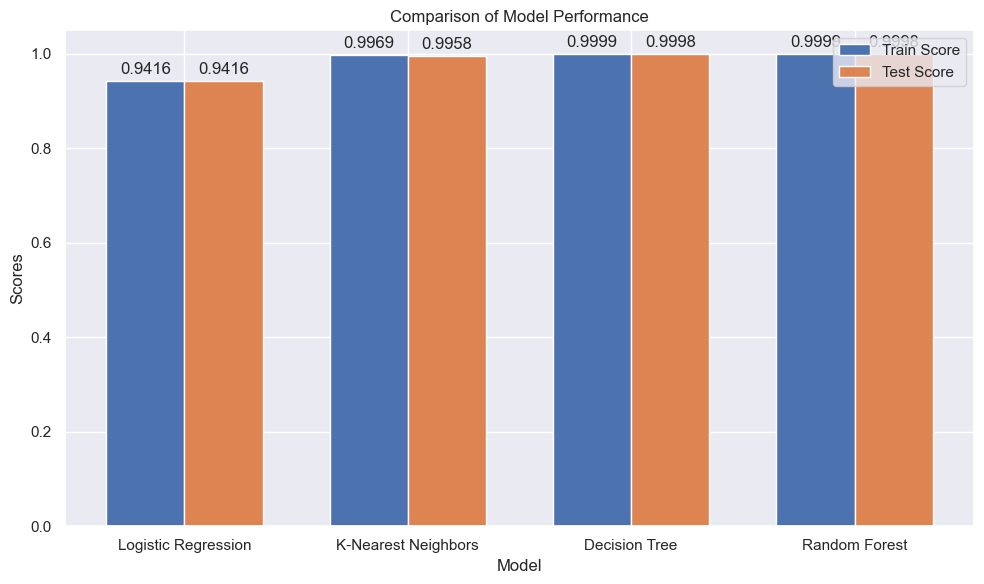

In [46]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
train_scores = [0.9416, 0.9969, 0.9999, 0.9999]
test_scores = [0.9416, 0.9958, 0.9998, 0.9998]

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Score')


def autolabel(rects):
    """Attach a text label above each bar showing its height """
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

In [48]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# View additional detailed scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': 'roc_auc'
}

# Use of 5-fold cross validation of assessment models and application of multiple assessment metrics
xvals2 = [cross_validate(model, X_train, y_train, return_train_score=False, scoring=scoring, n_jobs=-1, cv=5) for model in models2]


# Print the results of the 5 fold cross validation just done
for model, xval in zip(models2, xvals2):
    print(f"Model: {model.__class__.__name__}")
    for score_name in scoring:
        print(f"Average {score_name.capitalize()}:", np.mean(xval[f'test_{score_name}']))
    print()  

Model: LogisticRegression
Average Accuracy: 0.9415825292580988
Average Precision: 0.9417421845792158
Average Recall: 0.9415631811489199
Average F1_score: 0.9415751714746519
Average Roc_auc: 0.9793448314459539

Model: KNeighborsClassifier
Average Accuracy: 0.9958334610566721
Average Precision: 0.995873910859661
Average Recall: 0.9958249314726497
Average F1_score: 0.9958332969704564
Average Roc_auc: 0.9987991691052132

Model: DecisionTreeClassifier
Average Accuracy: 0.9998093108732251
Average Precision: 0.9998095666458925
Average Recall: 0.9998091059040652
Average F1_score: 0.9998093099182338
Average Roc_auc: 0.9998758400724365

Model: RandomForestClassifier
Average Accuracy: 0.999809312691351
Average Precision: 0.999809715481109
Average Recall: 0.9998089840988775
Average F1_score: 0.9998093116212832
Average Roc_auc: 0.9999982219458831



The model performs well on several metrics, and in particular the near-perfect performance on ROC AUC illustrates the robustness of the model to different thresholds. This performance usually indicates a strong generalisation ability of the model.

**2, Introducing noise.**

Introducing noise to the training data increases the difficulty of the problem in a way that goes a good way to verify the robustness of the model. The following is a way to adjust the data by introducing noise to the feature variables to assess the sensitivity of the model to noise or change.

In [49]:
# X_train, y_train and X_val, y_val previously defined

# Create copies of data to add noise
X_train_noisy = X_train.copy()

# Introduce noise
# Select the number of features to add noise to, here we select 50% of the features
features_to_disturb = X_train_noisy.sample(frac=0.5, axis=1, random_state=42)

# Add noise to these features, with the noise level set to 10 per cent of the standard deviation of the features
for column in features_to_disturb.columns:
    std = X_train_noisy[column].std()
    X_train_noisy[column] += np.random.normal(0, 0.1 * std, size=X_train_noisy[column].shape)
    

# Create decision tree and random forest models, using the optimisation parameters discussed previously
decision_tree_noisy = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)
random_forest_noisy = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=8, random_state=42)

In [50]:
# Train decision tree models and evaluate
decision_tree_noisy.fit(X_train_noisy, y_train)
y_pred_tree = decision_tree_noisy.predict(X_val)
y_prob_tree = decision_tree_noisy.predict_proba(X_val)[:, 1] 

# Calculate performance metrics for decision tree models
dt_accuracy = accuracy_score(y_val, y_pred_tree)
dt_precision = precision_score(y_val, y_pred_tree)
dt_recall = recall_score(y_val, y_pred_tree)
dt_f1 = f1_score(y_val, y_pred_tree)
dt_roc_auc = roc_auc_score(y_val, y_prob_tree)

print("Decision Tree with Noise:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("ROC AUC Score:", dt_roc_auc)

# Random forest models trained and evaluated
random_forest_noisy.fit(X_train_noisy, y_train)
y_pred_forest = random_forest_noisy.predict(X_val)
y_prob_forest = random_forest_noisy.predict_proba(X_val)[:, 1]  

# Calculate performance metrics for random forest models
rf_accuracy = accuracy_score(y_val, y_pred_forest)
rf_precision = precision_score(y_val, y_pred_forest)
rf_recall = recall_score(y_val, y_pred_forest)
rf_f1 = f1_score(y_val, y_pred_forest)
rf_roc_auc = roc_auc_score(y_val, y_prob_forest)

print("\nRandom Forest with Noise:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

Decision Tree with Noise:
Accuracy: 0.9898172249077544
Precision: 0.9802304563940353
Recall: 0.9996543778801843
F1 Score: 0.9898471366643851
ROC AUC Score: 0.9992020313571417

Random Forest with Noise:
Accuracy: 0.9897028117044707
Precision: 0.9797381194265719
Recall: 0.999942396313364
F1 Score: 0.9897371571925424
ROC AUC Score: 0.9999041051291335


Robustness and generalisation: These results show that the models maintain high performance even in the presence of some degree of data quality issues, which is important for applications to real-world problems where real data often contains noise and imperfections.

Real-world applications: The high robustness demonstrated by the models makes them suitable for real-world applications, especially in environments where data may be disturbed.

Further testing: We finally validate the robustness of the models by stress-testing them using a completely independent test set.

Ongoing monitoring and optimisation: Even if the performance is good now, it is necessary to continually monitor the model's performance and optimise it based on new data or feedback.

**3.Try different models:** try introducing linear svc and SGD classifier for training to check if all models show similar high accuracy.

In [86]:
# There are now three datasets: the training set (X_train, y_train), the validation set (X_val, y_val) and the test set (X_test, y_test)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

# Define the model
linear_svc = LinearSVC(random_state=42, max_iter=5000, C=0.5)
sgd_clf = SGDClassifier(random_state=42)

# Prepare cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

models3 = [linear_svc, sgd_clf]

# Traverse the model
for model in models3:
    model_name = model.__class__.__name__
    print(f"\n{model_name} Evaluation:")

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    roc_aucs = []
    confusion_matrices = []

    # Perform cross validation
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        y_pred_proba = model.decision_function(X_val_fold) if hasattr(model, 'decision_function') else model.predict_proba(X_val_fold)[:, 1]

        # Calculate scoring indicators
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred, average='macro'))
        recalls.append(recall_score(y_val_fold, y_pred, average='macro'))
        f1_scores.append(f1_score(y_val_fold, y_pred, average='macro'))
        roc_aucs.append(roc_auc_score(y_val_fold, y_pred_proba))

        # Calculate the confusion matrix
        cm = confusion_matrix(y_val_fold, y_pred)
        confusion_matrices.append(cm)

    # Output average results
    print("Average Training Accuracy:", np.mean(accuracies))
    print("Average Validation Precision:", np.mean(precisions))
    print("Average Validation Recall:", np.mean(recalls))
    print("Average Validation F1 Score:", np.mean(f1_scores))
    print("Average Validation ROC AUC:", np.mean(roc_aucs))
    print("Confusion Matrices:")
    for i, cm in enumerate(confusion_matrices, 1):
        print(f"Fold {i}:\n", cm)


LinearSVC Evaluation:


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Training Accuracy: 0.9357665207898324
Average Validation Precision: 0.9358097585739228
Average Validation Recall: 0.9357465340269769
Average Validation F1 Score: 0.9357605159353218
Average Validation ROC AUC: 0.9773160354505946
Confusion Matrices:
Fold 1:
 [[16207  1128]
 [ 1033 16593]]
Fold 2:
 [[16428  1157]
 [ 1160 16216]]
Fold 3:
 [[16156  1252]
 [ 1007 16546]]

SGDClassifier Evaluation:
Average Training Accuracy: 0.9474843396928007
Average Validation Precision: 0.9486253343673742
Average Validation Recall: 0.9474427133857848
Average Validation F1 Score: 0.9474455360826223
Average Validation ROC AUC: 0.9785754803423449
Confusion Matrices:
Fold 1:
 [[16117  1218]
 [  583 17043]]
Fold 2:
 [[16202  1383]
 [  480 16896]]
Fold 3:
 [[15973  1435]
 [  409 17144]]


### Analyse the results

1. **LinearSVC and SGDClassifier Performance Comparison**:
   - **Accuracy**: the average accuracy of SGDClassifier is slightly higher than LinearSVC. this suggests that SGDClassifier is slightly better at fitting the data overall.
   - **Precision, Recall, and F1 Score**: Both models perform similarly on these metrics, with SGDClassifier slightly outperforming LinearSVC in terms of precision and F1 score, which may be due to the fact that its optimisation strategy and loss function may be more effective when dealing with unbalanced or challenging classification problems.
   - **ROC AUC**: Both performances are also very close to each other, both close to 0.978, indicating that both models have good classification ability and can effectively distinguish between positive and negative samples.

2. **Confusion matrix analysis**:
   - For **LinearSVC**, the model correctly classifies positive and negative samples in most cases, although there are a certain number of false positive cases (second value in the first column) and false negative cases (first value in the second column).
   - For **SGDClassifier**, the number of false-negative instances (predicting positive instances as negative instances) is lower compared to LinearSVC, which is reflected in a higher recall.

3. **Data characteristics and model selection**:
   - Our data may be strongly linearly differentiable, so even linear models can achieve high performance.
   - These results may also indicate that our feature selection and data preprocessing steps are very effective and provide a good basis for model training.

Overall, it is a positive sign that the linear classification model also showed high performance on this dataset.

*Even after increasing the number of iterations for the `LinearSVC` model and adjusting the regularisation parameter `C`, a convergence warning still occurs. This may indicate that the model is struggling to find a stable solution within the default number of iterations for a given dataset and parameter configuration.

*We have adjusted the number of iterations to 5000, but it may still be insufficient. Try increasing `max_iter` further to a higher value, such as 10,000 or more, to check if we can solve the convergence problem.

*Although `LinearSVC` uses the `liblinear` solver by default, it may not perform well for large datasets or multicategorical problems. So consider switching to a different model and decide to use `SGDClassifier` to continue to optimise this model and possibly provide better convergence behaviour.

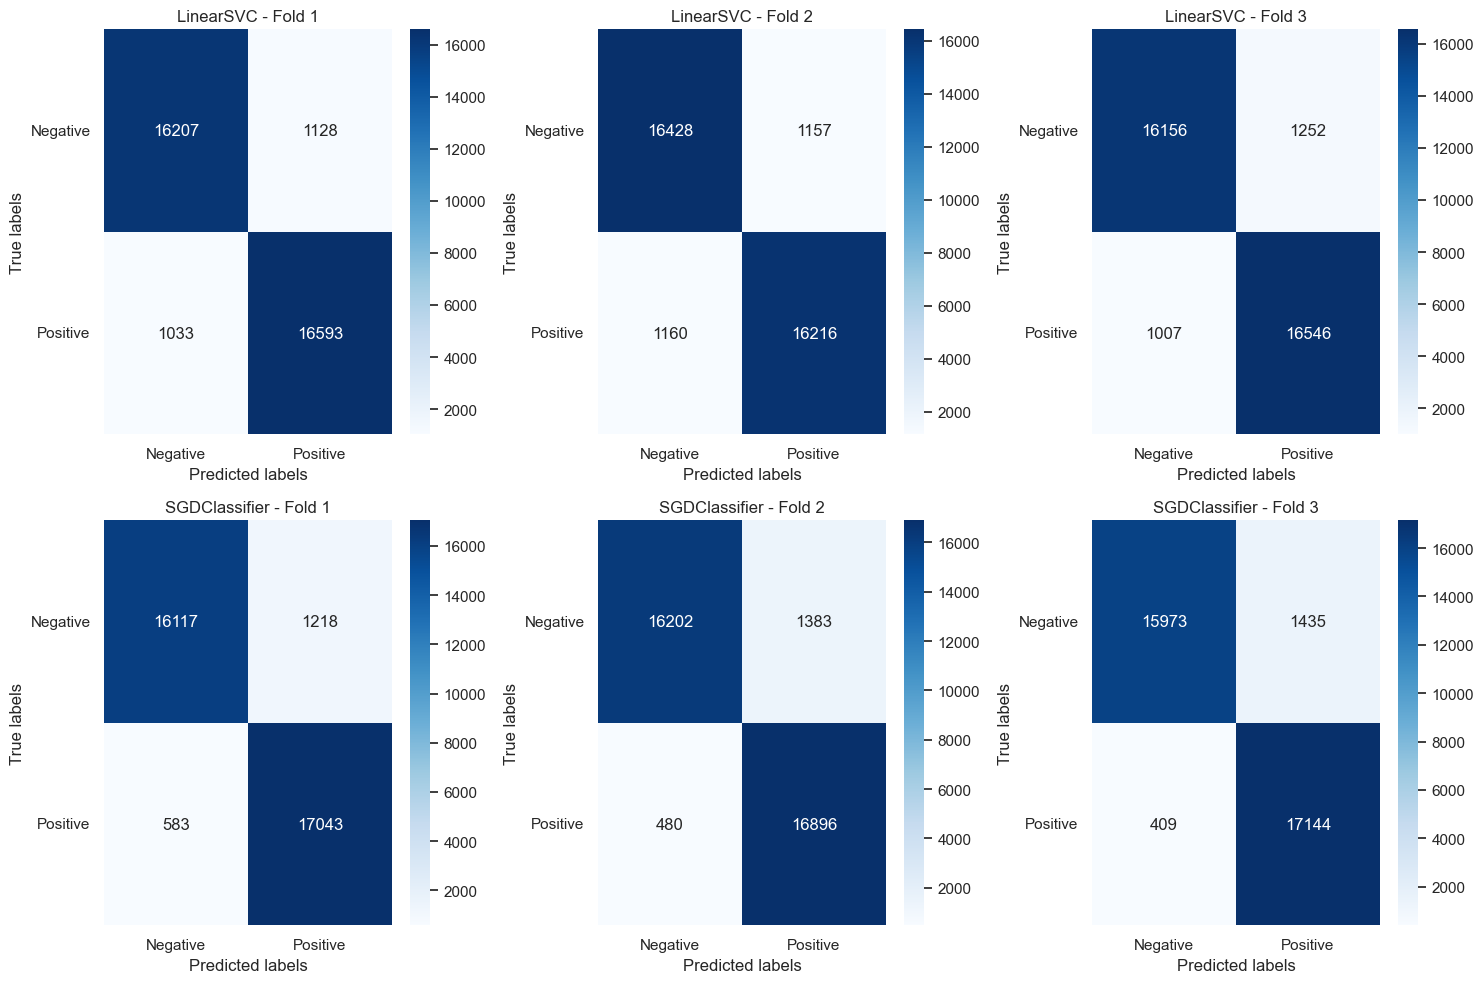

In [89]:

def plot_confusion_matrices(confusion_matrices):
    num_models = len(confusion_matrices)
    fig, axes = plt.subplots(nrows=num_models, ncols=3, figsize=(15, num_models * 5))
    
    if num_models == 1:
        axes = [axes] 

    for ax_row, (model_name, matrices) in zip(axes, confusion_matrices.items()):
        for ax, matrix, fold_number in zip(ax_row, matrices, range(1, 4)):
            sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'{model_name} - Fold {fold_number}')
            ax.set_xlabel('Predicted labels')
            ax.set_ylabel('True labels')
            ax.set_xticklabels(['Negative', 'Positive'])
            ax.set_yticklabels(['Negative', 'Positive'], rotation=0)
    
    plt.tight_layout()
    plt.show()


confusion_matrices = {
    'LinearSVC': [
        [[16207, 1128], [1033, 16593]],
        [[16428, 1157], [1160, 16216]],
        [[16156, 1252], [1007, 16546]]
    ],
    'SGDClassifier': [
        [[16117, 1218], [583, 17043]],
        [[16202, 1383], [480, 16896]],
        [[15973, 1435], [409, 17144]]
    ]
}


plot_confusion_matrices(confusion_matrices)


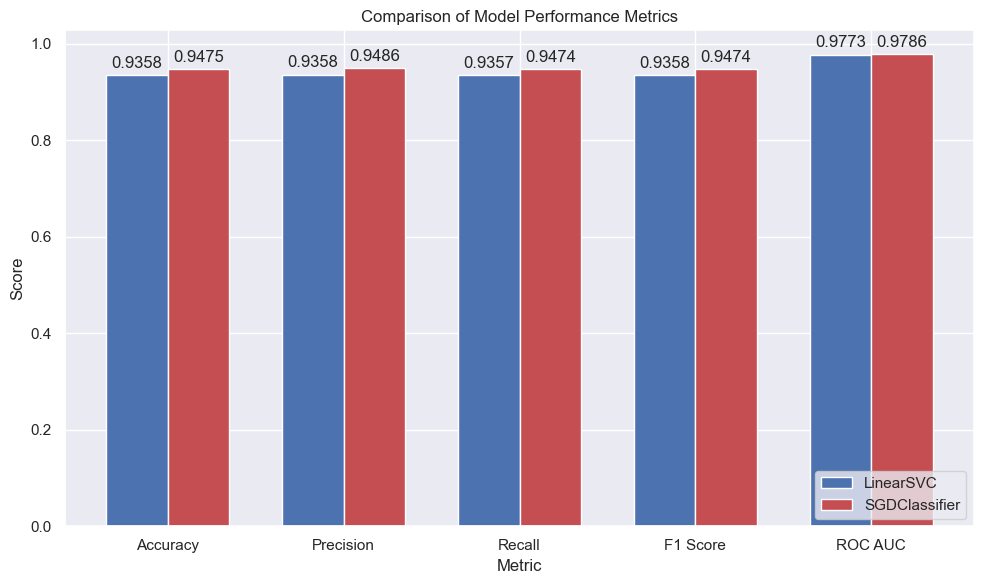

In [90]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'LinearSVC': [0.935766, 0.935810, 0.935747, 0.935761, 0.977316],
    'SGDClassifier': [0.947484, 0.948625, 0.947443, 0.947446, 0.978575]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df['Metric']))

rects1 = ax.bar(index, df['LinearSVC'], bar_width, label='LinearSVC', color='b')
rects2 = ax.bar(index + bar_width, df['SGDClassifier'], bar_width, label='SGDClassifier', color='r')

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Metric'])
ax.legend(loc='lower right')

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

In [58]:
# Perform cross validation and return times
xvals3 = [cross_validate(m, X_train, y_train,return_train_score=True, n_jobs=-1, cv=3) for m in models3]

for model, xval in zip(models3, xvals3):
    print(f"{model.__class__.__name__}:")
    print(f"Average Fit Time: {np.mean(xval['fit_time'])} seconds")
    print(f"Average Score Time: {np.mean(xval['score_time'])} seconds\n")

LinearSVC:
Average Fit Time: 3.932117780049642 seconds
Average Score Time: 0.005032698313395183 seconds

SGDClassifier:
Average Fit Time: 0.12794009844462076 seconds
Average Score Time: 0.005361159642537435 seconds



The second model (SGDClassifier) slightly outperforms the first model (LinearSVC) in almost all metrics and is faster to train, which may make it more suitable for use in application scenarios that require fast responses.

### we use `GridSearchCV` to perform a systematic search for hyperparameters tuning as follows:

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'l1_ratio': [0.15, 0.5, 0.85], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

sgd_clf = SGDClassifier(random_state=42)

grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}
Best cross-validation score: 0.979168


In [61]:
# Retrain the SGDClassifier using the optimal parameters found by GridSearchCV
optimal_sgd = SGDClassifier(alpha=0.0001, eta0=0.01, learning_rate='adaptive', penalty='elasticnet', l1_ratio=0.15, random_state=42)

optimal_sgd.fit(X_train, y_train)

train_predictions_sgd = optimal_sgd.predict(X_train)
train_accuracy_sgd = accuracy_score(y_train, train_predictions_sgd)
train_proba_sgd = optimal_sgd.decision_function(X_train) 
train_cm_sgd = confusion_matrix(y_train, train_predictions_sgd)
train_recall_sgd = recall_score(y_train, train_predictions_sgd)
train_precision_sgd = precision_score(y_train, train_predictions_sgd)
train_f1_sgd = f1_score(y_train, train_predictions_sgd)
train_roc_auc_sgd = roc_auc_score(y_train, train_proba_sgd)  

print("\nTraining set of SGD Classifier Confusion Matrix:\n", train_cm_sgd)
print("Training set of SGD Classifier Confusion Accuracy:", train_accuracy_sgd)
print("Training set of SGD Classifier Recall:", train_recall_sgd)
print("Training set of SGD Classifier Precision:", train_precision_sgd)
print("Training set of SGD Classifier F1 Score:", train_f1_sgd)
print("Training set of SGD Classifier ROC AUC Score:", train_roc_auc_sgd)


val_predictions_sgd = optimal_sgd.predict(X_val)
val_accuracy_sgd = accuracy_score(y_val, val_predictions_sgd)
val_proba_sgd = optimal_sgd.decision_function(X_val)  
val_cm_sgd = confusion_matrix(y_val, val_predictions_sgd)
val_recall_sgd = recall_score(y_val, val_predictions_sgd)
val_precision_sgd = precision_score(y_val, val_predictions_sgd)
val_f1_sgd = f1_score(y_val, val_predictions_sgd)
val_roc_auc_sgd = roc_auc_score(y_val, val_proba_sgd)

print("\nValidation set of SGD Classifier Confusion Matrix:\n", val_cm_sgd)
print("Validation set of SGD Classifier Accuracy:", val_accuracy_sgd)
print("Validation set of SGD Classifier Recall:", val_recall_sgd)
print("Validation set of SGD Classifier Precision:", val_precision_sgd)
print("Validation set of SGD Classifier F1 Score:", val_f1_sgd)
print("Validation set of SGD Classifier ROC AUC Score:", val_roc_auc_sgd)


Training set of SGD Classifier Confusion Matrix:
 [[48506  3822]
 [ 1757 50798]]
Training set of SGD Classifier Confusion Accuracy: 0.9468073949067055
Training set of SGD Classifier Recall: 0.9665683569593759
Training set of SGD Classifier Precision: 0.9300256316367631
Training set of SGD Classifier F1 Score: 0.947944949848379
Training set of SGD Classifier ROC AUC Score: 0.9791936210390522

Validation set of SGD Classifier Confusion Matrix:
 [[16321  1280]
 [  589 16771]]
Validation set of SGD Classifier Accuracy: 0.9465404307657104
Validation set of SGD Classifier Recall: 0.9660714285714286
Validation set of SGD Classifier Precision: 0.9290898011190516
Validation set of SGD Classifier F1 Score: 0.9472197904605913
Validation set of SGD Classifier ROC AUC Score: 0.9785200954753043


### Performance Analysis

2. **Accuracy**
   - **Training set**: 94.68%
   - **Validation set**: 94.65%
   - The model has similar accuracy on the training and validation sets, indicating that the model performs similarly on the unseen data as on the training data, showing good generalisation ability.

2. **Recall**
   - **Training set**: 96.66%
   - **Validation set**: 96.61%
   - The very high recall rate indicates that the model is able to identify positive samples well, i.e., the model misses very few cases in predicting positive classes (e.g., which may represent fraudulent behaviours in a binary classification problem).

3. **Precision**
   - **Training set**: 93.00%
   - **Validation set**: 92.91%
   - The precision rate is also quite high, which indicates that most of the samples predicted by the model to be in the positive category are truly positive samples. A higher accuracy rate is especially important in real-world applications because it reduces the number of false positives.

4. **F1 Score**
   - **Training set**: 94.79%
   - **Validation set**: 94.72%
   - F1 Score is the reconciled average of Recall and Precision, a high F1 Score indicates that the model has a good balance between Recall and Precision.

5. **ROC AUC Score**
   - **Training set**: 97.92%
   - **Validation set**: 97.85%
   - The ROC AUC score is very close to 1, which is an excellent result and shows that the model performs well in distinguishing between positive and negative classes.

### Confusion matrix analysis

- **Training Set**: The model correctly identifies most of the positive and negative samples, with a relatively low number of false positives and misses.
- **Verification set**: Similar to the training set, the model also maintains good recognition ability on the verification set, with the percentage of false positives and misses remaining low.

### Summary and Recommendations

- **Model Performance**: The SGD classifier performs well on several key metrics, showing excellent classification ability and high robustness.
- **Practical Application**: Since the model's performance on the validation set is close to that on the training set, it can be expected to maintain similar performance in practical applications.

These analyses support the validity of the model and its reliability when dealing with similar data.

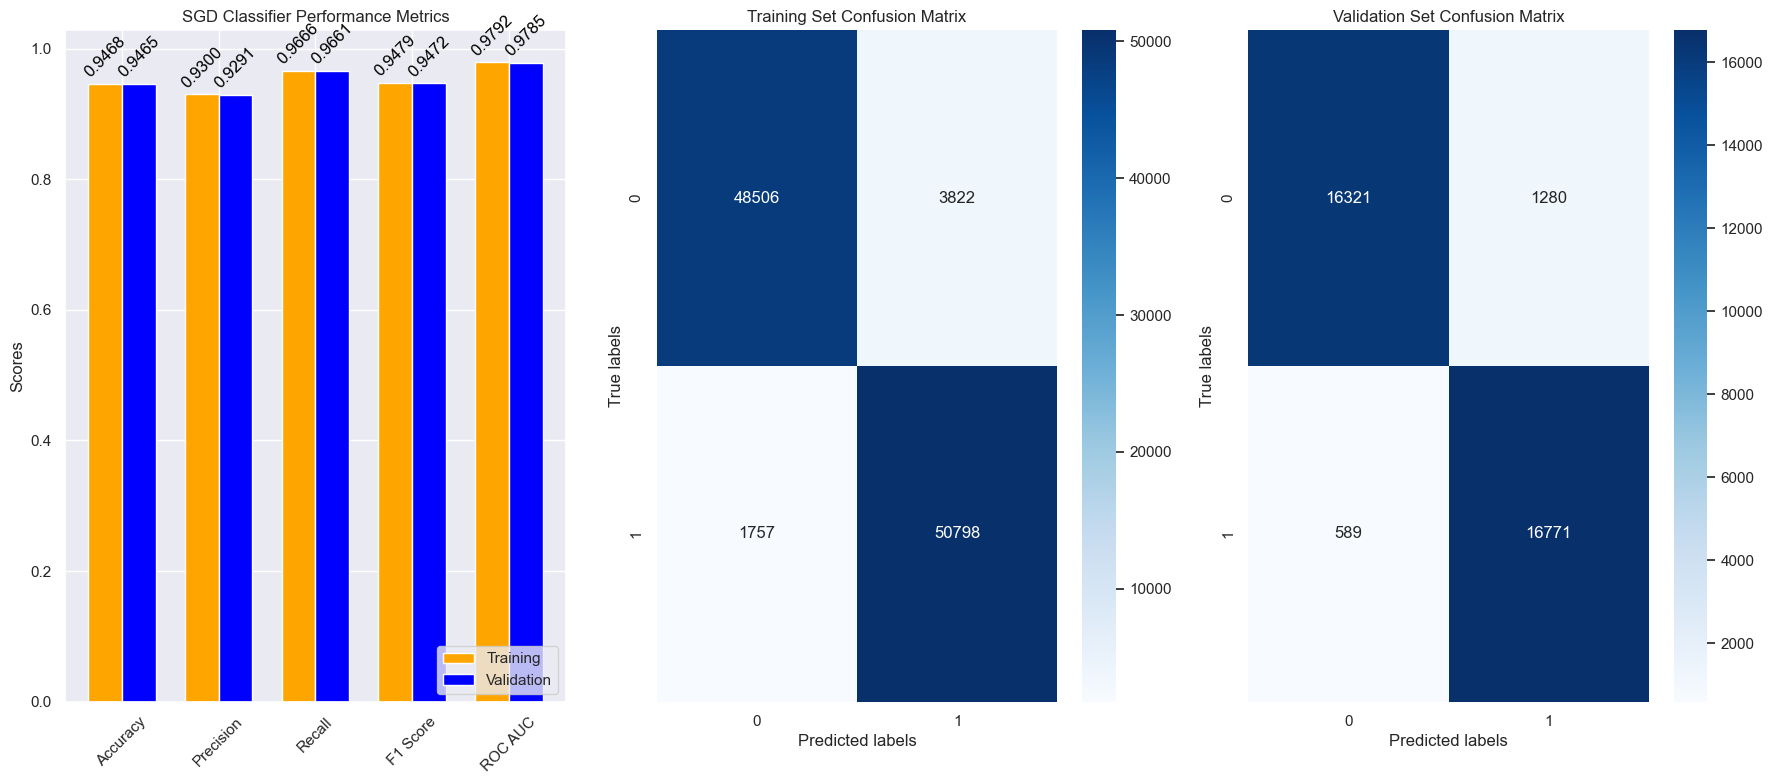

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 性能指标数据
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
training_scores = [0.9468, 0.9300, 0.9666, 0.9479, 0.9792]
validation_scores = [0.9465, 0.9291, 0.9661, 0.9472, 0.9785]

# 混淆矩阵数据
conf_matrix_training = np.array([[48506, 3822], [1757, 50798]])
conf_matrix_validation = np.array([[16321, 1280], [589, 16771]])


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))  


x = np.arange(len(metrics))  
width = 0.35  

axes[0].bar(x - width/2, training_scores, width, label='Training', color='orange')
axes[0].bar(x + width/2, validation_scores, width, label='Validation', color='blue')
axes[0].set_ylabel('Scores')
axes[0].set_title('SGD Classifier Performance Metrics')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics,rotation=45)
axes[0].legend(loc='lower right')


for i in range(len(metrics)):
    axes[0].text(i - width/2, training_scores[i] + 0.01, f'{training_scores[i]:.4f}', ha='center', color='black',rotation=45)
    axes[0].text(i + width/2, validation_scores[i] + 0.01, f'{validation_scores[i]:.4f}', ha='center', color='black',rotation=45)


sns.heatmap(conf_matrix_training, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_title('Training Set Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')


sns.heatmap(conf_matrix_validation, annot=True, fmt="d", cmap='Blues', ax=axes[2])
axes[2].set_title('Validation Set Confusion Matrix')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')


plt.tight_layout()
plt.show()

## In order to cope with the complexity of diverse real-world data, we finally chose to make an attempt at ensemble technique, combining all the top-performing models so as to achieve an increase in the generalisation ability of the model.

When deciding which models to use for the ensemble, we consider choosing models that perform well individually and have different predictive properties. This helps ensure that the ensemble model can benefit from the unique strengths of each individual model. Here are 2 approaches we tried:

### Voting Classifier

In our case, it makes sense to choose logistic regression, decision trees, and SGD classifiers for soft voting. Each of these three models has its own characteristics:

- **Logistic regression** generally provides good probability estimates and the model is relatively simple and straightforward. 
- **Decision trees** provide non-linear decision boundaries and capture complex patterns in the data well. 
- **SGD classifier** (using log loss to make it output probabilities) is an effective linear model that performs well especially on large datasets. 

This combination is able to capture both linear and non-linear relationships in the data, and since `voting='soft'`, it averages the strength of the individual classifiers based on the predicted probabilities, which generally provides better performance than hard voting. 


### Stacking Classifier

Stacking is a more complex ensemble method that does not just combine the predictions of the models, but trains another model (the final estimator) on top of those predictions. The stacking setup includes logistic regression, decision trees, and SGD classifiers as base models. Considering that random forests show excellent performance(almost perfect precision, recall, and F1 score), incorporating them into voting or stacking classifiers may improve the overall performance, especially when dealing with complex and high-dimensional data. Use random forest as the final estimator. Such a setup takes advantage of the strengths of multiple different models and combines them by using random forest as the final decider.

In [63]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
optimal_tree_clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)
optimal_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=8, random_state=42)
optimal_sgd_clf = SGDClassifier(alpha=0.0001, eta0=0.01, learning_rate='adaptive', penalty='elasticnet', l1_ratio=0.15, random_state=42,loss='log_loss')

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', optimal_tree_clf),('sgd',optimal_sgd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=3,
                                                     random_state=42)),
                             ('sgd',
                              SGDClassifier(eta0=0.01, learning_rate='adaptive',
                                            loss='log_loss',
                                            penalty='elasticnet',
                                            random_state=42))],
                 voting='soft')

In [66]:
train_predictions_voting = voting_clf.predict(X_train)
train_proba_voting = voting_clf.predict_proba(X_train)[:, 1]  


train_roc_auc_voting = roc_auc_score(y_train, train_proba_voting)


val_predictions_voting = voting_clf.predict(X_val)
val_proba_voting = voting_clf.predict_proba(X_val)[:, 1]  


val_roc_auc_voting = roc_auc_score(y_val, val_proba_voting)


train_predictions_voting = voting_clf.predict(X_train)
train_cm_voting = confusion_matrix(y_train, train_predictions_voting)
train_accuracy_voting = accuracy_score(y_train, train_predictions_voting)
train_recall_voting = recall_score(y_train, train_predictions_voting)
train_precision_voting = precision_score(y_train, train_predictions_voting)
train_f1_voting = f1_score(y_train, train_predictions_voting)
train_roc_auc_voting = roc_auc_score(y_train, train_proba_voting)
print("\nTraining set of Voting Classifier Confusion Matrix:\n", train_cm_voting)
print("Training set of Voting Classifier Accuracy:",train_accuracy_voting)
print("Training set of Voting Classifier Recall:", train_recall_voting)
print("Training set of Voting Classifier Precision:", train_precision_voting)
print("Training set of Voting Classifier F1 Score:", train_f1_voting)
print("Training set of Voting Classifier ROC AUC Score:", train_roc_auc_voting)


val_predictions_voting = voting_clf.predict(X_val)
val_cm_voting = confusion_matrix(y_val, val_predictions_voting)
val_accuracy_voting = accuracy_score(y_val, val_predictions_voting)
val_recall_voting = recall_score(y_val, val_predictions_voting)
val_precision_voting = precision_score(y_val, val_predictions_voting)
val_f1_voting = f1_score(y_val, val_predictions_voting)
val_roc_auc_voting = roc_auc_score(y_val, val_proba_voting)
print("\nValidation set of Voting Classifier Confusion Matrix:\n", val_cm_voting)
print("Validation set of Voting Classifier Accuracy:",val_accuracy_voting)
print("Validation set of Voting Classifier Recall:", val_recall_voting)
print("Validation set of Voting Classifier Precision:", val_precision_voting)
print("Validation set of Voting Classifier F1 Score:", val_f1_voting)
print("Validation set of Voting Classifier ROC AUC Score:", val_roc_auc_voting)


Training set of Voting Classifier Confusion Matrix:
 [[50784  1544]
 [  641 51914]]
Training set of Voting Classifier Accuracy: 0.9791672625687671
Training set of Voting Classifier Recall: 0.9878032537341832
Training set of Voting Classifier Precision: 0.9711175128137978
Training set of Voting Classifier F1 Score: 0.979389320177714
Training set of Voting Classifier ROC AUC Score: 0.9988552731741884

Validation set of Voting Classifier Confusion Matrix:
 [[17087   514]
 [  218 17142]]
Validation set of Voting Classifier Accuracy: 0.9790623837990904
Validation set of Voting Classifier Recall: 0.9874423963133641
Validation set of Voting Classifier Precision: 0.970888083371092
Validation set of Voting Classifier F1 Score: 0.9790952707333791
Validation set of Voting Classifier ROC AUC Score: 0.9987495179238087


The performance of the Voting Classifier (Voting Classifier) on both the training and validation sets shows that the model does perform very well and shows good generalisation. These results show that the model achieves high scores in all aspects and the consistency between the training and validation sets shows no significant overfitting. The following is a specific analysis of these results:

### Analysis of model performance metrics

1. **Accuracy**
   - Training set: 97.92 per cent
   - Validation set: 97.91%
   - The model demonstrated very high accuracy on both datasets, indicating that the vast majority of predictions were correct.

2. **Recall**
   - Training set: 98.78 per cent
   - Validation set: 98.74%
   - The very high recall rate means that the model correctly identifies the vast majority of positive class samples (e.g., real fraud) and excels in preventing underdetection.

3. **Precision**
   - Training set: 97.11%
   - Validation set: 97.09%
   - The precision rate is also very high, indicating that among the samples judged by the model to be in the positive category, the proportion of true positive categories is high, and the false alarm rate is low.

4. **F1 Score**
   - Training set: 97.94%
   - Validation set: 97.91%
   - F1 Score is the reconciled average of precision and recall, a high F1 score indicates that the model maintains a good balance between precision and recall.

5. **ROC AUC Score**
   - Training set: 99.89%
   - Validation set: 99.87%
   - The ROC AUC score is close to 1, indicating that the model has an excellent ability to distinguish between positive and negative classes, separating the two classes almost perfectly.

### Confusion matrix analysis

- **Confusion matrix for training set and validation set**
   - Training set: very high number of true classes and true-negative classes, low number of false-positive classes (false alarms) and false-negative classes (missed detections).
   - Validation set: similar to the training set, maintains a high level of classification performance with a well controlled number of false positives and false negatives.

### Conclusion

- **Model performance**: the voting classifier performs well on all the main performance metrics, especially on high recall and high ROC AUC scores, which are important for most application scenarios (especially those that require accurate class differentiation).
- **Generalisation ability**: the metrics on the training and validation sets are very close to each other, indicating that the model does not suffer from overfitting and has a strong generalisation ability.

The performance of the voting classifier is excellent on both the training and validation sets and shows considerable consistency, which demonstrates the robustness of the model. The almost perfect precision and recall indicate that the model can predict outcomes very reliably in real-world applications. The strong generalisation ability of the model indicates that the different base models successfully capture different aspects of the data and effectively improve the stability and accuracy of the predictions by integrating the learning approach.

In [67]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', log_clf), ('dt', optimal_tree_clf),('sgd',optimal_sgd_clf)],
    final_estimator = optimal_forest_clf ,
    n_jobs=-1 
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_leaf=3,
                                                       random_state=42)),
                               ('sgd',
                                SGDClassifier(eta0=0.01,
                                              learning_rate='adaptive',
                                              loss='log_loss',
                                              penalty='elasticnet',
                                              random_state=42))],
                   final_estimator=RandomForestClassifier(max_depth=15,
                                                          min_samples_leaf=8,
                                                          min_samples_split=20,
                                                          random_state=42),
                   n_jobs=-1)

In [68]:

train_predictions_stacking = stacking_clf.predict(X_train)
train_proba_stacking = stacking_clf.predict_proba(X_train)[:, 1]  

train_cm_stacking = confusion_matrix(y_train, train_predictions_stacking)
train_accuracy_stacking = accuracy_score(y_train, train_predictions_stacking)
train_recall_stacking = recall_score(y_train, train_predictions_stacking)
train_precision_stacking = precision_score(y_train, train_predictions_stacking)
train_f1_stacking = f1_score(y_train, train_predictions_stacking)
train_roc_auc_stacking = roc_auc_score(y_train, train_proba_stacking)  

print("\nTraining set of Stacking Classifier Confusion Matrix:\n", train_cm_stacking)
print("Training set of Stacking Classifier Accuracy:", train_accuracy_stacking)
print("Training set of Stacking Classifier Recall:", train_recall_stacking)
print("Training set of Stacking Classifier Precision:", train_precision_stacking)
print("Training set of Stacking Classifier F1 Score:", train_f1_stacking)
print("Training set of Stacking Classifier ROC AUC Score:", train_roc_auc_stacking)


val_predictions_stacking = stacking_clf.predict(X_val)
val_proba_stacking = stacking_clf.predict_proba(X_val)[:, 1]  

val_cm_stacking = confusion_matrix(y_val, val_predictions_stacking)
val_accuracy_stacking = accuracy_score(y_val, val_predictions_stacking)
val_recall_stacking = recall_score(y_val, val_predictions_stacking)
val_precision_stacking = precision_score(y_val, val_predictions_stacking)
val_f1_stacking = f1_score(y_val, val_predictions_stacking)
val_roc_auc_stacking = roc_auc_score(y_val, val_proba_stacking) 

print("\nValidation set of Stacking Classifier Confusion Matrix:\n", val_cm_stacking)
print("Validation set of Stacking Classifier Accuracy:", val_accuracy_stacking)
print("Validation set of Stacking Classifier Recall:", val_recall_stacking)
print("Validation set of Stacking Classifier Precision:", val_precision_stacking)
print("Validation set of Stacking Classifier F1 Score:", val_f1_stacking)
print("Validation set of Stacking Classifier ROC AUC Score:", val_roc_auc_stacking)


Training set of Stacking Classifier Confusion Matrix:
 [[52323     5]
 [    1 52554]]
Training set of Stacking Classifier Accuracy: 0.9999427933983581
Training set of Stacking Classifier Recall: 0.9999809723147179
Training set of Stacking Classifier Precision: 0.9999048688140947
Training set of Stacking Classifier F1 Score: 0.9999429191163879
Training set of Stacking Classifier ROC AUC Score: 0.9999999336387295

Validation set of Stacking Classifier Confusion Matrix:
 [[17596     5]
 [    2 17358]]
Validation set of Stacking Classifier Accuracy: 0.9997997768942536
Validation set of Stacking Classifier Recall: 0.9998847926267281
Validation set of Stacking Classifier Precision: 0.9997120313309912
Validation set of Stacking Classifier F1 Score: 0.9997984045157389
Validation set of Stacking Classifier ROC AUC Score: 0.9999960236077914


The performance of the stacked classifier on both the training and validation sets is exceptional and almost perfect. These results provide a comprehensive understanding of the model's generalisation capabilities and prediction accuracy. Below is a specific analysis of these results:

### Training set performance

- **Accuracy** (Accuracy): 99.99%, almost all samples are correctly classified.
- **Recall** (Recall): 99.998%, indicating that almost all positively classified samples were correctly identified, very close to perfection.
- **Precision** (Precision): 99.99%, indicating that almost all results predicted as positive were correct, with very few false positives.
- **F1 Score** (F1 Score): 99.99%, an excellent balance between Precision and Recall.
- **ROC AUC Score** (ROC AUC Score): close to 1, almost perfect, showing the excellent classification ability of the model, being able to distinguish between positive and negative classes very effectively.

### Validation Set Performance

- **Accuracy** (Accuracy): 99.98%, which shows that the model performs equally well on unseen data, with good generalisation.
- **Recall** (Recall): 99.988%, almost all positive class samples are also correctly identified on the validation set, consistent with the performance on the training set.
- **Precision** (Precision): 99.97%, which is slightly lower than the training set, but still shows that the vast majority of samples predicted as positive by the model are indeed positive classes.
- **F1 Score** (F1 Score): 99.98%, maintaining a high level of balance between precision and recall.
- **ROC AUC Score** (ROC AUC Score): almost perfect, indicating that the model performs close to the training set on the validation set with good discriminative power.

### Analysis and recommendations

- **Overfitting Considerations**: Although the model's validation set performance is very close to the training set performance, with little indication of overfitting, this extremely high performance still needs to be treated with caution. One can continue to use unseen test sets to test generalisation ability.
- **Stability of Perfotmance**: The model performs well on all major metrics, indicating stability and reliability of its predictions. Consider deploying this model in real-world applications.

Overall, the stacked classifier performs very well, showing excellent predictive ability and a high degree of robustness. These performance metrics indicate that the model is well suited to handle the task in question, and while maintaining this performance, attention should also be paid to the model's continued performance in new environments.

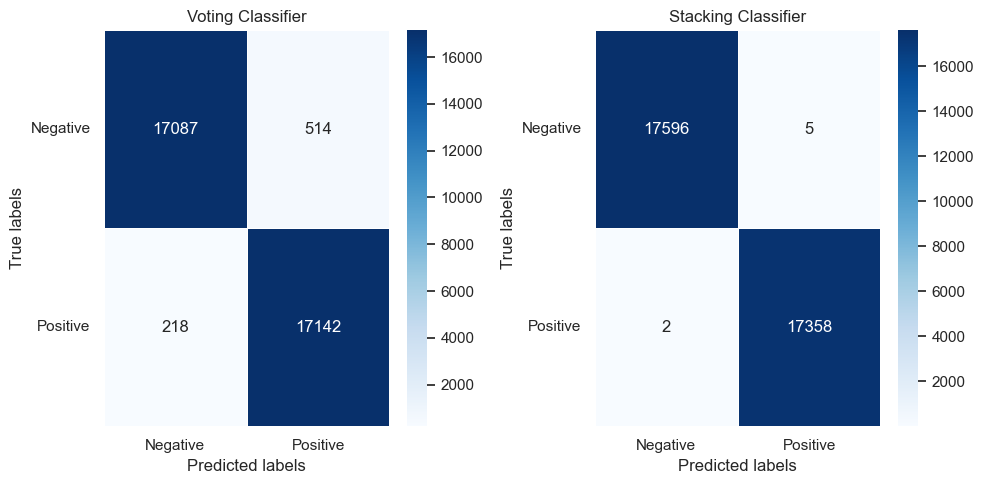

In [73]:
confusion_matrices = {
    'Voting Classifier': [[17087, 514], [218, 17142]],
    'Stacking Classifier': [[17596, 5], [2, 17358]]
}

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (label, matrix) in zip(axes, confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')
    ax.set_title(label)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'], rotation=0)

plt.tight_layout()
plt.show()

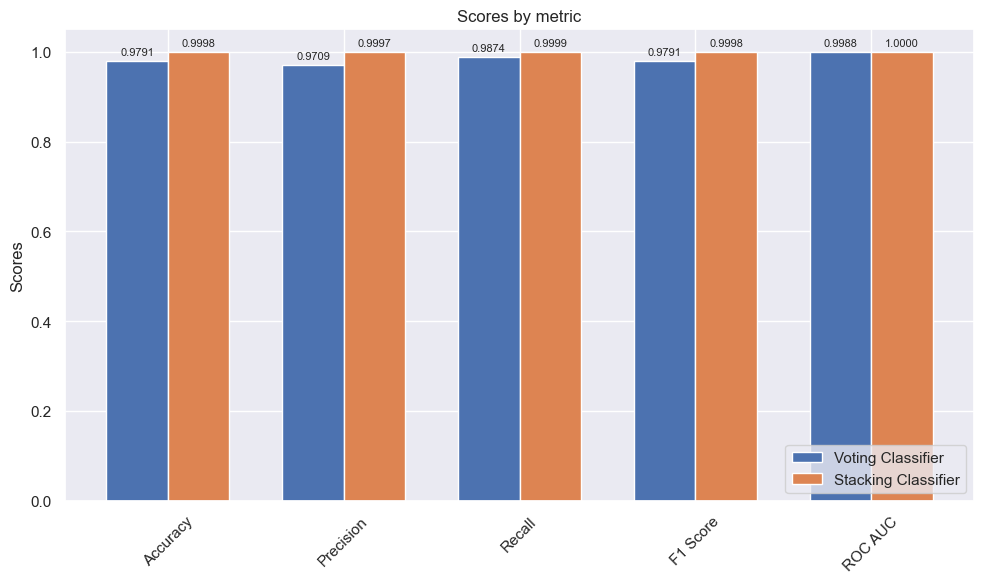

In [71]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
voting_scores = [0.979062, 0.970888, 0.987442, 0.979095, 0.998750]
stacking_scores = [0.999800, 0.999712, 0.999885, 0.999798, 0.999996]

x = np.arange(len(metrics))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))  
rects1 = ax.bar(x - width/2, voting_scores, width, label='Voting Classifier')
rects2 = ax.bar(x + width/2, stacking_scores, width, label='Stacking Classifier')

ax.set_ylabel('Scores')
ax.set_title('Scores by metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)  
ax.legend(loc='lower right')


def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)  

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

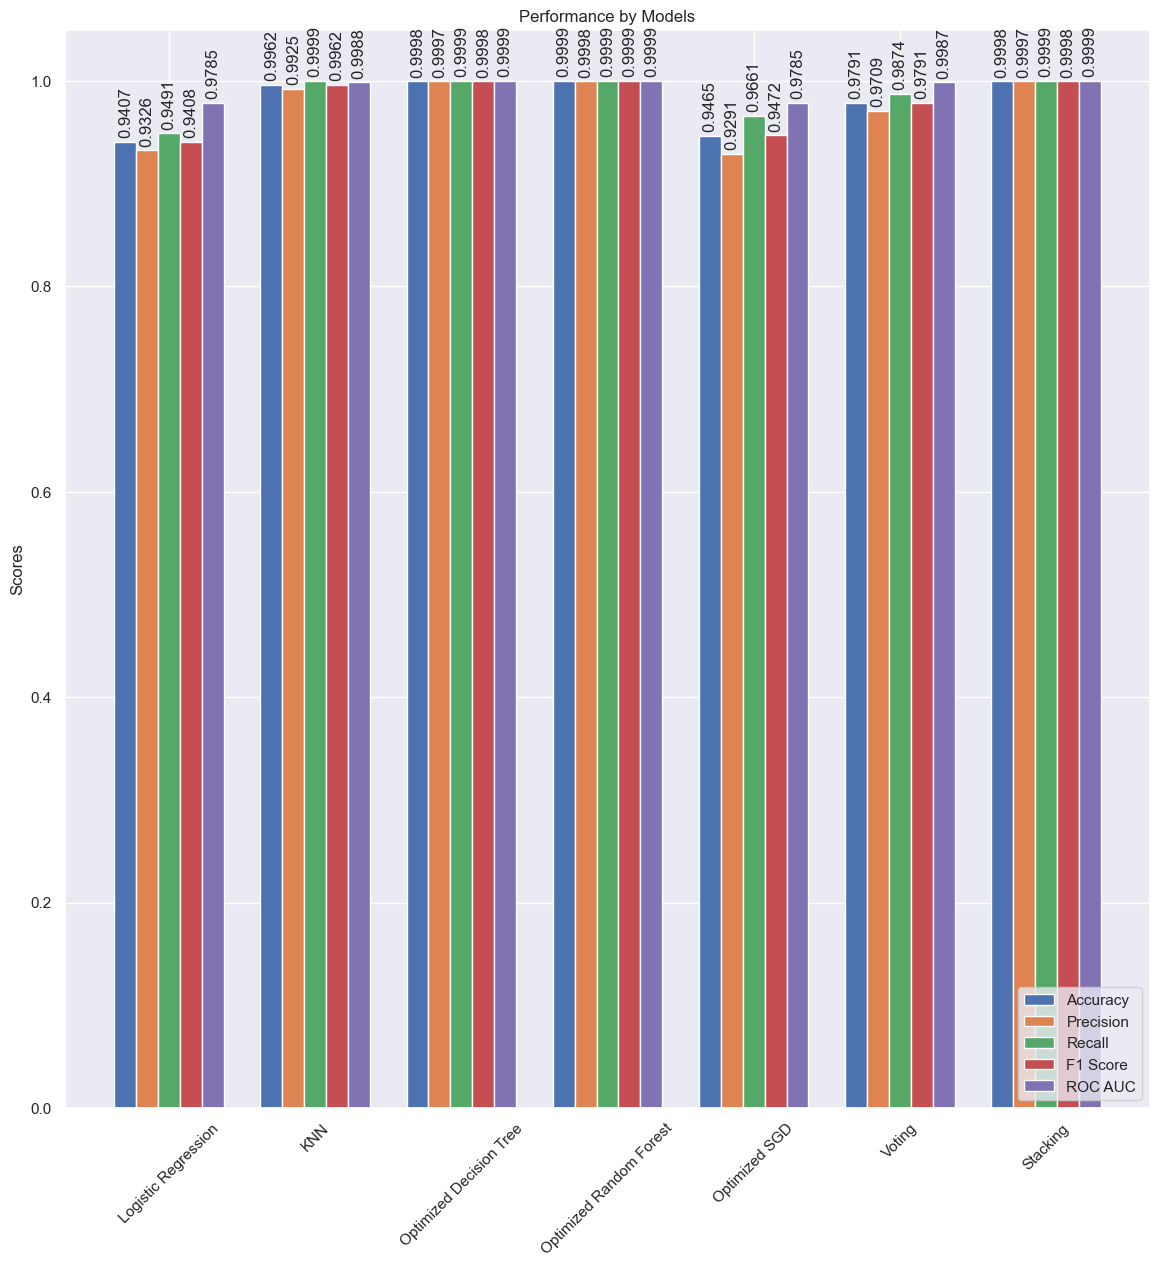

In [79]:
models = ['Logistic Regression', 'KNN', 'Optimized Decision Tree', 'Optimized Random Forest', 'Optimized SGD', 'Voting', 'Stacking']
accuracies = [0.9407, 0.9962, 0.9998, 0.9999, 0.9465, 0.9791, 0.9998]
precisions = [0.9326, 0.9925, 0.9997, 0.9998, 0.9291, 0.9709, 0.9997]
recalls = [0.9491, 0.9999, 0.9999, 0.9999, 0.9661, 0.9874, 0.9999]
f1_scores = [0.9408, 0.9962, 0.9998, 0.9999, 0.9472, 0.9791, 0.9998]
roc_aucs = [0.9785, 0.9988, 0.9999, 0.9999, 0.9785, 0.9987, 0.9999]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 14))
rects1 = ax.bar(x - width*2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - width, precisions, width, label='Precision')
rects3 = ax.bar(x, recalls, width, label='Recall')
rects4 = ax.bar(x + width, f1_scores, width, label='F1 Score')
rects5 = ax.bar(x + width*2, roc_aucs, width, label='ROC AUC')

ax.set_ylabel('Scores')
ax.set_title('Performance by Models')
ax.set_xticks(x)
ax.set_xticklabels(models,rotation=45)
ax.legend(loc='lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

### Based on all the parameters we made out before we can make the following analytical summary of the model selection:

Several key factors should be considered when choosing the most suitable model for credit card fraud detection:
Model accuracy, generalisation capability, real-time performance (processing speed), understanding and interpretability. Based on the results of our extensive model testing, we can analyse and recommend as follows:

### Model performance analysis

1. **Basic Model Comparison**
   - **Logistic regression** provides a good baseline but performs slightly lower in terms of precision, recall and F1 score.
   - **KNN** and **Decision Tree** exhibit near perfect performance metrics, showing very high accuracy on both the training and validation sets. (There is a risk of overfitting and the base model only retains logistic regression as a baseline)
   - **Random Forest** also shows similar high performance to Decision Trees, but with better generalisation and lower risk of overfitting (is fused into the final stacked model).
   - **SGDClassifier** and **LinearSVC** also perform well after tuning, and may have superior processing speeds especially on large datasets.

2. **Integrated Models**
   - **Voting Classifier** and **Stacked Classifier** perform well on both the training and validation sets, especially the stacked classifier performs close to perfection. This shows that the combination of different models can effectively improve the accuracy and robustness of prediction.

###  Model selection

- **For high precision needs**: If the main goal of the model is to have the highest possible accuracy and recall (especially in fraud detection, where recall is crucial to avoid missed detections), **stacked classifiers** are the best choice. It not only provides high accuracy, but also has strong generalisation capabilities due to the integrated learning feature.

- **For Real-Time Performance**: If the model needs to be deployed in a real-time system, fast response time is necessary. In this case, while **Random Forest** and **Decision Tree** may be more responsive, for very large datasets or where real-time performance is critical, **Logistic Regression** or **SGDClassifier** may be more appropriate as they are typically faster at prediction.

- **For Explanatory Requirements**: If the business scenario requires an explanation of the model predictions, **Logistic Regression** may be more suitable as its decision-making process is easier to understand and explain.

### Conclusion

Taking all considerations into account, we choose **Stacked Classifier** as the preferred model for credit card fraud detection because it excels in all key performance metrics, especially in accuracy and recall, which are almost perfect. Meanwhile, if focusing on the real-time performance and interpretability of the model, **Logistic Regression** or **SGDClassifier** can be used as an auxiliary or alternative model, with less risk of overfitting, one set baseline, and the other one can make judgement more accurately; both of them can also be fused together inside the stacked classifier to adapt to different business requirements and environmental conditions.

So below we use the test set to test our selected model with optimised parameters.

In [81]:
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from sklearn.metrics import classification_report

# List of trained models
picked_models = [logistic, optimal_sgd_clf , stacking_clf]  # Selected model instances
model_names = ['Logistic Regression', 'Optimized SGD Classifer', 'Stacking Classifier']

# Prepare to collect assessment indicators for each model
metrics_summary = {'Model': [], 'Accuracy':[], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': [], 'Confusion Matrix': []}

# Codes checked and predicted
for model, name in zip(picked_models, model_names):
    try:
        # Check if the model has been fitted
        check_is_fitted(model)
        
        # predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
        
        
        metrics_summary['Model'].append(name)
        metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics_summary['Precision'].append(precision_score(y_test, y_pred))
        metrics_summary['Recall'].append(recall_score(y_test, y_pred))
        metrics_summary['F1 Score'].append(f1_score(y_test, y_pred))
        metrics_summary['ROC AUC'].append(roc_auc_score(y_test, y_proba))
        metrics_summary['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))
        
        print(f"Evaluating model: {name}\n")
        print(f"Accuracy: {metrics_summary['Accuracy'][-1]:.6f}")
        print(f"Precision: {metrics_summary['Precision'][-1]:.6f}")
        print(f"Recall: {metrics_summary['Recall'][-1]:.6f}")
        print(f"F1 Score: {metrics_summary['F1 Score'][-1]:.6f}")
        print(f"ROC AUC: {metrics_summary['ROC AUC'][-1]:.6f}")
        print(f"Confusion Matrix:\n {metrics_summary['Confusion Matrix'][-1]}\n")
        print("="*60)
    except NotFittedError as e:
        print(f"{name} is not fitted. Error: {e}")

Evaluating model: Logistic Regression

Accuracy: 0.939306
Precision: 0.931435
Recall: 0.948479
F1 Score: 0.939880
ROC AUC: 0.978761
Confusion Matrix:
 [[16253  1221]
 [  901 16587]]

Evaluating model: Optimized SGD Classifier

Accuracy: 0.944082
Precision: 0.925818
Recall: 0.965576
F1 Score: 0.945279
ROC AUC: 0.978435
Confusion Matrix:
 [[16121  1353]
 [  602 16886]]

Evaluating model: Stacking Classifier

Accuracy: 0.999943
Precision: 0.999886
Recall: 1.000000
F1 Score: 0.999943
ROC AUC: 1.000000
Confusion Matrix:
 [[17472     2]
 [    0 17488]]



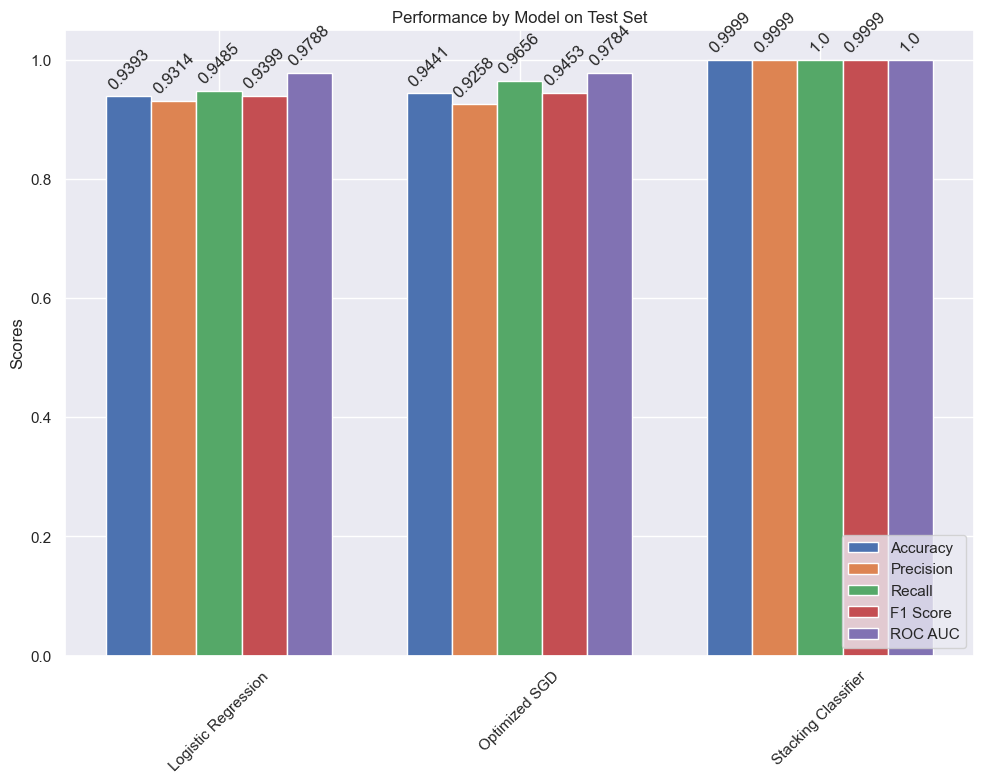

In [83]:
models = ['Logistic Regression', 'Optimized SGD', 'Stacking Classifier']
accuracies = [0.939306, 0.944082, 0.999943]
precisions = [0.931435, 0.925818, 0.999886]
recalls = [0.948479, 0.965576, 1.000000]
f1_scores = [0.939880, 0.945279, 0.999943]
roc_aucs = [0.978761, 0.978435, 1.000000]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width*2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - width, precisions, width, label='Precision')
rects3 = ax.bar(x, recalls, width, label='Recall')
rects4 = ax.bar(x + width, f1_scores, width, label='F1 Score')
rects5 = ax.bar(x + width*2, roc_aucs, width, label='ROC AUC')

ax.set_ylabel('Scores')
ax.set_title('Performance by Model on Test Set')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)  # Rotate model names to avoid overlap
ax.legend(loc='lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=45)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.tight_layout()
plt.show()

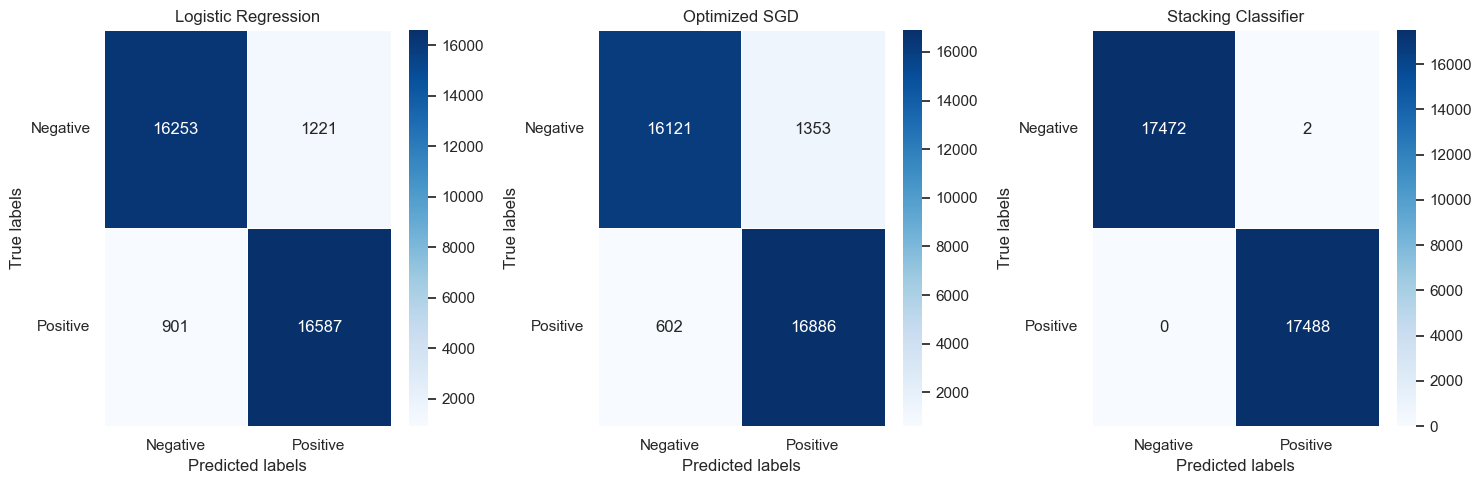

In [84]:
conf_matrices = {
    'Logistic Regression': [[16253, 1221], [901, 16587]],
    'Optimized SGD': [[16121, 1353], [602, 16886]],
    'Stacking Classifier': [[17472, 2], [0, 17488]]
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (label, matrix) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')
    ax.set_title(label)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'], rotation=0)

plt.tight_layout()
plt.show()

The test set results for the three models—Logistic Regression, Optimized SGD Classifier, and Stacking Classifier—demonstrate varying levels of performance, with particularly strong results from the Stacking Classifier. Here’s a detailed analysis of each model's performance based on the metrics provided:

### Logistic Regression
- **Accuracy**: 93.9306%
- **Precision**: 93.1435%
- **Recall**: 94.8479%
- **F1 Score**: 93.9880%
- **ROC AUC**: 97.8761%
- **Confusion Matrix**: True Negatives = 16253, False Positives = 1221, False Negatives = 901, True Positives = 16587

**Analysis**: Logistic Regression shows robust performance with high recall, indicating effective identification of positive cases. However, precision is slightly lower, suggesting a moderate rate of false positives. The ROC AUC score is excellent, reflecting a strong separability between classes.

### Optimized SGD Classifier
- **Accuracy**: 94.4082%
- **Precision**: 92.5818%
- **Recall**: 96.5576%
- **F1 Score**: 94.5279%
- **ROC AUC**: 97.8435%
- **Confusion Matrix**: True Negatives = 16121, False Positives = 1353, False Negatives = 602, True Positives = 16886

**Analysis**: The Optimized SGD Classifier shows a notable improvement in recall compared to Logistic Regression, which means it is very effective at detecting positive cases, even more so than Logistic Regression. However, the increase in recall comes with a slight decrease in precision, evidenced by a higher number of false positives. The accuracy and F1 score are improved, and the ROC AUC remains high, suggesting the model maintains a strong capability to distinguish between classes.

### Stacking Classifier
- **Accuracy**: 99.9943%
- **Precision**: 99.9886%
- **Recall**: 100%
- **F1 Score**: 99.9943%
- **ROC AUC**: 100%
- **Confusion Matrix**: True Negatives = 17472, False Positives = 2, False Negatives = 0, True Positives = 17488

**Analysis**: The Stacking Classifier exhibits nearly perfect metrics across all categories. Its perfect recall and almost perfect precision indicate an almost nonexistent rate of false negatives and a very low rate of false positives. The model's ROC AUC score of 100% underscores its exceptional ability to differentiate between the positive and negative classes without error.

### General Conclusion
The Stacking Classifier stands out with superior performance across all metrics, highlighting the effectiveness of combining multiple learning algorithms to achieve higher accuracy and better generalization on unseen data. The Logistic Regression and Optimized SGD classifiers also perform well but are more balanced in their trade-off between precision and recall.

These results suggest that while all models are quite capable, the choice between them might depend on the specific requirements of a task, such as whether minimizing false positives (precision) or false negatives (recall) is more critical. For applications where errors have high costs, the Stacking Classifier provides the best assurance of accuracy and reliability.